In [1]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
car_df = pd.read_csv('cars.csv')

In [3]:
car_df.head()

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  
0             NaN  
1            Full  
2             NaN  
3            Full  
4             NaN

In [4]:
brand_df = pd.read_csv('brand.csv')

In [5]:
brand_df

title         country
0           skoda  Czech Republic
1        vauxhall  United Kingdom
2         hyundai     South Korea
3            mini  United Kingdom
4            ford   United States
5           volvo          Sweden
6         peugeot          France
7             bmw         Germany
8         citroen          France
9   mercedes-benz         Germany
10          mazda           Japan
11           saab          Sweden
12     volkswagen         Germany
13          honda           Japan
14             mg  United Kingdom
15         toyota           Japan
16           seat           Spain
17         nissan           Japan
18           alfa           Italy
19        renault          France
20            kia     South Korea
21         proton        Malaysia
22           fiat           Italy
23           audi         Germany
24     mitsubishi           Japan
25          lexus           Japan
26           land  United Kingdom
27      chevrolet   United States
28         suzuki           Japan
29          dacia         Romania
30       daihatsu           Japan
31           jeep   United States
32         jaguar  United Kingdom
33       chrysler   United States
34          rover  United Kingdom
35             ds          France
36         daewoo     South Korea
37          dodge   United States
38        porsche         Germany
39         subaru           Japan
40       infiniti           Japan
41         abarth           Italy
42          smart         Germany
43         marcos  United Kingdom
44       maserati           Italy
45      ssangyong     South Korea
46        lagonda  United Kingdom
47          isuzu           Japan

In [6]:
brand_df.head()

title         country
0     skoda  Czech Republic
1  vauxhall  United Kingdom
2   hyundai     South Korea
3      mini  United Kingdom
4      ford   United States

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [8]:
car_df.isna().mean() * 100

title                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Previous Owners      38.269596
Fuel type             0.000000
Body type             0.000000
Engine                1.220504
Gearbox               0.000000
Doors                 0.678058
Seats                 0.949281
Emission Class        2.359642
Service history      85.353946
dtype: float64

### 컬럼별 결측치 확인

In [9]:
car_df[car_df['Previous Owners'].isna()]

title  Price  Mileage(miles)  Registration_Year  \
2        HYUNDAI I30    949          137000               2011   
4     VAUXHALL CORSA   1000           85000               2013   
6         FORD FOCUS    798          140599               2008   
7     VAUXHALL CORSA   1995           90000               2009   
8          VOLVO 740    750          225318               2025   
...              ...    ...             ...                ...   
3677       ROVER 800   3975           34000               1995   
3680      CITROEN C3   1795           85962               2009   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   

      Previous Owners Fuel type  Body type Engine    Gearbox  Doors  Seats  \
2                 NaN    Petrol  Hatchback   1.4L     Manual    5.0    5.0   
4                 NaN    Diesel  Hatchback   1.3L     Manual    5.0    5.0   
6                 NaN    Petrol  Hatchback   1.6L     Manual    5.0    5.0   
7                 NaN    Petrol  Hatchback   1.2L     Manual    3.0    5.0   
8                 NaN    Petrol     Estate   2.3L  Automatic    5.0    NaN   
...               ...       ...        ...    ...        ...    ...    ...   
3677              NaN    Petrol     Saloon   2.7L  Automatic    4.0    NaN   
3680              NaN    Diesel  Hatchback   1.4L     Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L     Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L     Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L     Manual    5.0    5.0   

     Emission Class Service history  
2            Euro 5             NaN  
4            Euro 5             NaN  
6            Euro 4             NaN  
7            Euro 4             NaN  
8               NaN             NaN  
...             ...             ...  
3677            NaN             NaN  
3680         Euro 4             NaN  
3683         Euro 5             NaN  
3684         Euro 5             NaN  
3685         Euro 4            Full  

[1411 rows x 13 columns]

In [10]:
car_df[car_df['Engine'].isna()]

title  Price  Mileage(miles)  Registration_Year  \
679         BMW 3 SERIES   4200           68060               2007   
835        TOYOTA MARK X   7500           77000               2021   
856         NISSAN CUBIC   4500           47000               2007   
1087             AUDI A1   7995           50500               2012   
1304        MAZDA MAZDA6   1500          155670               2015   
1429          FORD FOCUS   1895          109000               2009   
1533          CITROEN C1   3900           71000               2015   
1619             FORD KA   2490           68837               2007   
2022             AUDI A3   5750          139225               2012   
2136        TOYOTA PRIUS   8950           66000               2012   
2194         MAZDA MX-30  13899           13865               2021   
2288         NISSAN LEAF   5390           60695               2014   
2299         NISSAN LEAF   5390           60695               2014   
2337         NISSAN LEAF   5390           60695               2014   
2349         NISSAN LEAF   5390           60695               2014   
2361         NISSAN LEAF   5390           60695               2014   
2384         NISSAN LEAF   5390           60695               2014   
2394         NISSAN LEAF   5390           60695               2014   
2454         NISSAN LEAF   5390           60695               2014   
2465         NISSAN LEAF   5390           60695               2014   
2523           FIAT 500L   5250           79308               2015   
2573         NISSAN LEAF   5390           60695               2014   
2584         NISSAN LEAF   5390           60695               2014   
2645         NISSAN LEAF   5390           60695               2014   
2655         NISSAN LEAF   5390           60695               2014   
2675         NISSAN LEAF   5390           60695               2014   
2694         NISSAN LEAF   5390           60695               2014   
2711         NISSAN LEAF   5390           60695               2014   
2719  VAUXHALL ASTRA GTC   5995           76000               2014   
2743         NISSAN LEAF   5390           60695               2014   
2768         NISSAN LEAF   5390           60695               2014   
2790         NISSAN LEAF   5390           60695               2014   
2798         NISSAN LEAF   5390           60695               2014   
2832         NISSAN LEAF   5390           60695               2014   
3022         NISSAN LEAF   5390           60695               2014   
3031     VAUXHALL AMPERA   9499           65767               2014   
3034         NISSAN LEAF   5390           60695               2014   
3035         NISSAN LEAF   5390           60695               2014   
3067         NISSAN LEAF   5390           60695               2014   
3075         NISSAN LEAF   5390           60695               2014   
3098         NISSAN LEAF   5390           60695               2014   
3109         NISSAN LEAF   5390           60695               2014   
3199         NISSAN LEAF   5390           60695               2014   
3572       ISUZU TROOPER   2250          147700               2001   
3623      VAUXHALL CORSA  13998           28045               2020   

      Previous Owners              Fuel type  Body type Engine    Gearbox  \
679               1.0                 Petrol     Saloon    NaN  Automatic   
835               3.0                 Petrol     Saloon    NaN  Automatic   
856               3.0                 Petrol  Hatchback    NaN     Manual   
1087              NaN                 Petrol  Hatchback    NaN  Automatic   
1304              1.0                 Diesel     Estate    NaN     Manual   
1429              NaN                 Petrol  Hatchback    NaN     Manual   
1533              3.0                 Petrol  Hatchback    NaN     Manual   
1619              4.0                 Petrol  Hatchback    NaN     Manual   
2022              3.0                 Diesel  Hatchback    NaN  Automatic   
2136              NaN       

In [11]:
car_df[car_df['Doors'].isna()]

title  Price  Mileage(miles)  Registration_Year  \
513       NISSAN LAFESTA   3900           37000               2012   
595       VAUXHALL ASTRA   3950           56800               2015   
679         BMW 3 SERIES   4200           68060               2007   
699       MITSUBISHI FTO   8900           58900               2001   
823      VOLKSWAGEN POLO   6700           49600               2012   
835        TOYOTA MARK X   7500           77000               2021   
856         NISSAN CUBIC   4500           47000               2007   
957       NISSAN ELGRAND   4200           96000               2017   
1038          HONDA JAZZ   6750           33000               2013   
1058     VOLKSWAGEN POLO   6450           53193               2011   
1060        BMW 3 SERIES   4000           94000               2007   
1140     VOLKSWAGEN POLO   6900           35515               2012   
1304        MAZDA MAZDA6   1500          155670               2015   
1533          CITROEN C1   3900           71000               2015   
1613     VOLKSWAGEN GOLF   1895           61000               2001   
1619             FORD KA   2490           68837               2007   
1957           JAGUAR XJ   8000           95000               2011   
2022             AUDI A3   5750          139225               2012   
2136        TOYOTA PRIUS   8950           66000               2012   
2235        TOYOTA PRIUS   6350           72000               2012   
2375      MARCOS MARTINA  11495           19000               1981   
2512      MITSUBISHI GTO  15000           60742               2003   
2523           FIAT 500L   5250           79308               2015   
2719  VAUXHALL ASTRA GTC   5995           76000               2014   
2762           HONDA FIT   4450           79208               2010   

      Previous Owners      Fuel type    Body type Engine    Gearbox  Doors  \
513               NaN         Petrol          MPV   2.0L  Automatic    NaN   
595               4.0         Diesel    Hatchback   1.7L     Manual    NaN   
679               1.0         Petrol       Saloon    NaN  Automatic    NaN   
699               NaN         Petrol        Coupe   2.0L  Automatic    NaN   
823               NaN         Petrol    Hatchback   1.2L  Automatic    NaN   
835               3.0         Petrol       Saloon    NaN  Automatic    NaN   
856               3.0         Petrol    Hatchback    NaN     Manual    NaN   
957               3.0         Petrol      Minibus   2.0L  Automatic    NaN   
1038              NaN  Petrol Hybrid    Hatchback   1.5L  Automatic    NaN   
1058              NaN         Petrol    Hatchback   1.2L  Automatic    NaN   
1060              2.0         Petrol       Saloon   2.5L  Automatic    NaN   
1140              NaN         Petrol    Hatchback   1.2L  Automatic    NaN   
1304              1.0         Diesel       Estate    NaN     Manual    NaN   
1533              3.0         Petrol    Hatchback    NaN     Manual    NaN   
1613              5.0         Petrol    Hatchback   1.6L  Automatic    NaN   
1619              4.0         Petrol    Hatchback    NaN     Manual    NaN   
1957              5.0         Diesel       Saloon   3.0L  Automatic    NaN   
2022              3.0         Diesel    Hatchback    NaN  Automatic    NaN   
2136              NaN  Petrol Hybrid    Hatchback    NaN  Automatic    NaN   
2235              1.0  Petrol Hybrid    Hatchback   1.8L  Automatic    NaN   
2375              5.0         Petrol  Convertible   2.0L     Manual    NaN   
2512              4.0         Petrol        Coupe   3.0L     Manual    NaN   
2523              1.0         Diesel          MPV    NaN  Automatic    NaN   
2719              3.0         Diesel        Coupe    NaN     Manual    NaN   
2762              1.0         Petrol    Hatchback   1.3L  Automatic    NaN   

      Seats Emission Class Service history  
513     NaN            NaN             NaN  
595     5.0            NaN             NaN  
679     NaN            NaN        

In [12]:
car_df[car_df['Seats'].isna()]

title  Price  Mileage(miles)  Registration_Year  \
8                VOLVO 740    750          225318               2025   
107             CITROEN XM   3250          126000               1995   
229      MERCEDES-BENZ 260   2995           57400               1991   
237              MG MIDGET   1875           75043               1972   
513         NISSAN LAFESTA   3900           37000               2012   
645             ROVER MINI   1650           49309               1990   
679           BMW 3 SERIES   4200           68060               2007   
699         MITSUBISHI FTO   8900           58900               2001   
733           TOYOTA CAMRY   2389          125000               1990   
823        VOLKSWAGEN POLO   6700           49600               2012   
835          TOYOTA MARK X   7500           77000               2021   
856           NISSAN CUBIC   4500           47000               2007   
931           BMW 3 SERIES   6700          105000               1999   
1006              SAAB 900   5995          157000               1992   
1053       VOLKSWAGEN GOLF   1250          110000               1996   
1060          BMW 3 SERIES   4000           94000               2007   
1239          NISSAN SUNNY    999           60000               1985   
1304          MAZDA MAZDA6   1500          155670               2015   
1353          BMW 3 SERIES   3495          115000               1987   
1381            CITROEN BX   4975           96000               1990   
1533            CITROEN C1   3900           71000               2015   
1617             SEAT LEON  10995           76000               2017   
1619               FORD KA   2490           68837               2007   
1863          BMW 5 SERIES  11490          104000               2015   
2022               AUDI A3   5750          139225               2012   
2026         PROTON PROTON   3995           15760               1995   
2136          TOYOTA PRIUS   8950           66000               2012   
2456        VAUXHALL COMBO   4250           35616               2010   
2512        MITSUBISHI GTO  15000           60742               2003   
2523             FIAT 500L   5250           79308               2015   
2719    VAUXHALL ASTRA GTC   5995           76000               2014   
3024  LAGONDA LG6 ROADSTER  14995           84000               1953   
3116       VOLKSWAGEN GOLF   7000          130000               1988   
3464         TOYOTA CARINA   2450          120000               1991   
3677             ROVER 800   3975           34000               1995   

      Previous Owners      Fuel type    Body type Engine    Gearbox  Doors  \
8                 NaN         Petrol       Estate   2.3L  Automatic    5.0   
107               4.0         Diesel    Hatchback   2.5L     Manual    5.0   
229               NaN         Petrol       Saloon   2.6L  Automatic    4.0   
237               3.0         Petrol  Convertible   1.3L     Manual    2.0   
513               NaN         Petrol          MPV   2.0L  Automatic    NaN   
645               4.0         Petrol       Saloon   1.0L  Automatic    2.0   
679               1.0         Petrol       Saloon    NaN  Automatic    NaN   
699               NaN         Petrol        Coupe   2.0L  Automatic    NaN   
733               NaN         Petrol       Estate   2.0L  Automatic    5.0   
823               NaN         Petrol    Hatchback   1.2L  Automatic    NaN   
835               3.0         Petrol       Saloon    NaN  Automatic    NaN   
856               3.0         Petrol    Hatchback    NaN     Manual    NaN   
931               7.0         Petrol        Coupe   2.5L     Manual    2.0   
1006              5.0         Petrol  Convertible   2.0L     Manual    2.0   
1053              NaN         Petrol  Convertible   2.0L     Manual    2.0   
1060              2.0         Petrol       Saloon   2.5L  Automatic    NaN   
1239              NaN         Petrol       Saloon   1.3L     Manual    4.0   
1304              1.0   

In [13]:
car_df[car_df['Emission Class'].isna()]

title  Price  Mileage(miles)  Registration_Year  \
8             VOLVO 740    750          225318               2025   
95      RENAULT FLUENCE   2490           67104               2010   
163       HONDA ODYSSEY   2449           88240               2012   
178   MERCEDES-BENZ CLK   3995           70000               2009   
229   MERCEDES-BENZ 260   2995           57400               1991   
...                 ...    ...             ...                ...   
3199        NISSAN LEAF   5390           60695               2014   
3464      TOYOTA CARINA   2450          120000               1991   
3572      ISUZU TROOPER   2250          147700               2001   
3623     VAUXHALL CORSA  13998           28045               2020   
3677          ROVER 800   3975           34000               1995   

      Previous Owners Fuel type  Body type Engine    Gearbox  Doors  Seats  \
8                 NaN    Petrol     Estate   2.3L  Automatic    5.0    NaN   
95                1.0    Diesel     Saloon   1.5L     Manual    4.0    5.0   
163               NaN    Petrol        MPV   2.4L  Automatic    5.0    7.0   
178               NaN    Petrol      Coupe   2.0L  Automatic    2.0    5.0   
229               NaN    Petrol     Saloon   2.6L  Automatic    4.0    NaN   
...               ...       ...        ...    ...        ...    ...    ...   
3199              NaN  Electric  Hatchback    NaN  Automatic    5.0    5.0   
3464              NaN    Petrol     Saloon   1.6L     Manual    4.0    NaN   
3572              NaN    Diesel        SUV    NaN  Automatic    5.0    5.0   
3623              NaN  Electric  Hatchback    NaN  Automatic    5.0    5.0   
3677              NaN    Petrol     Saloon   2.7L  Automatic    4.0    NaN   

     Emission Class Service history  
8               NaN             NaN  
95              NaN             NaN  
163             NaN             NaN  
178             NaN             NaN  
229             NaN             NaN  
...             ...             ...  
3199            NaN             NaN  
3464            NaN             NaN  
3572            NaN             NaN  
3623            NaN             NaN  
3677            NaN             NaN  

[87 rows x 13 columns]

In [14]:
car_df[car_df['Service history'].isna()]

title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
2        HYUNDAI I30    949          137000               2011   
4     VAUXHALL CORSA   1000           85000               2013   
5      HYUNDAI COUPE    800          124196               2007   
6         FORD FOCUS    798          140599               2008   
...              ...    ...             ...                ...   
3681  NISSAN QASHQAI   1695          104000               2009   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
5                 3.0    Petrol      Coupe   2.0L  Manual    3.0    4.0   
6                 NaN    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3681              3.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history  
0            Euro 6             NaN  
2            Euro 5             NaN  
4            Euro 5             NaN  
5            Euro 4             NaN  
6            Euro 4             NaN  
...             ...             ...  
3681         Euro 4             NaN  
3682         Euro 4             NaN  
3683         Euro 5             NaN  
3684         Euro 5             NaN  
3686         Euro 5             NaN  

[3147 rows x 13 columns]

결측치를 확인했지만 일단 방향을 가격예측으로 할지 특성에 따른 클러스터링을 할지
갈피를 못잡겠다.
일단은 car_df, brand_df 데이터를 병합부터 하자

### 데이터 병합

In [15]:
brand_df['title'] = brand_df['title'].str.upper()

In [16]:
car_df['title'].str.split(' ').str[0]

0          SKODA
1       VAUXHALL
2        HYUNDAI
3           MINI
4       VAUXHALL
          ...   
3682     RENAULT
3683        AUDI
3684         BMW
3685       HONDA
3686    VAUXHALL
Name: title, Length: 3687, dtype: object

In [17]:
car_df = car_df.rename({'title':'title2'},axis=1)
car_df

title2  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history  
0            Euro 6             NaN  
1            Euro 4            Full  
2            Euro 5             NaN  
3            Euro 4            Full  
4            Euro 5             NaN  
...             ...             ...  
3682         Euro 4             NaN  
3683         Euro 5             NaN  
3684         Euro 5             NaN  
3685         Euro 4            Full  
3686         Euro 5             NaN  

[3687 rows x 13 columns]

In [18]:
car_df['title'] = car_df['title2'].str.split(' ').str[0]
car_df

title2  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history     title  
0            Euro 6             NaN     SKODA  
1            Euro 4            Full  VAUXHALL  
2            Euro 5             NaN   HYUNDAI  
3            Euro 4            Full      MINI  
4            Euro 5             NaN  VAUXHALL  
...             ...             ...       ...  
3682         Euro 4             NaN   RENAULT  
3683         Euro 5             NaN      AUDI  
3684         Euro 5             NaN       BMW  
3685         Euro 4            Full     HONDA  
3686         Euro 5             NaN  VAUXHALL  

[3687 rows x 14 columns]

In [19]:
car_df['model'] = car_df['title2'].str.split(' ').str[1]
car_df


title2  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history     title   model  
0            Euro 6             NaN     SKODA   FABIA  
1            Euro 4            Full  VAUXHALL   CORSA  
2            Euro 5             NaN   HYUNDAI     I30  
3            Euro 4            Full      MINI   HATCH  
4            Euro 5             NaN  VAUXHALL   CORSA  
...             ...             ...       ...     ...  
3682         Euro 4             NaN   RENAULT  MEGANE  
3683         Euro 5             NaN      AUDI      A4  
3684         Euro 5             NaN       BMW       3  
3685         Euro 4            Full     HONDA  ACCORD  
3686         Euro 5             NaN  VAUXHALL   CORSA  

[3687 rows x 15 columns]

In [20]:
car_df = car_df.drop('title2', axis=1)
car_df

Price  Mileage(miles)  Registration_Year  Previous Owners Fuel type  \
0      6900           70189               2016              3.0    Diesel   
1      1495           88585               2008              4.0    Petrol   
2       949          137000               2011              NaN    Petrol   
3      2395           96731               2010              5.0    Petrol   
4      1000           85000               2013              NaN    Diesel   
...     ...             ...                ...              ...       ...   
3682   1395           76202               2006              4.0    Petrol   
3683   6990          119000               2012              NaN    Petrol   
3684   3995          139000               2013              NaN    Diesel   
3685   1390          179190               2007              NaN    Diesel   
3686   2000           82160               2013              7.0    Petrol   

      Body type Engine Gearbox  Doors  Seats Emission Class Service history  \
0     Hatchback   1.4L  Manual    5.0    5.0         Euro 6             NaN   
1     Hatchback   1.2L  Manual    3.0    5.0         Euro 4            Full   
2     Hatchback   1.4L  Manual    5.0    5.0         Euro 5             NaN   
3     Hatchback   1.4L  Manual    3.0    4.0         Euro 4            Full   
4     Hatchback   1.3L  Manual    5.0    5.0         Euro 5             NaN   
...         ...    ...     ...    ...    ...            ...             ...   
3682  Hatchback   1.6L  Manual    5.0    5.0         Euro 4             NaN   
3683     Saloon   2.0L  Manual    4.0    5.0         Euro 5             NaN   
3684     Saloon   2.0L  Manual    4.0    5.0         Euro 5             NaN   
3685     Estate   2.2L  Manual    5.0    5.0         Euro 4            Full   
3686  Hatchback   1.2L  Manual    5.0    5.0         Euro 5             NaN   

         title   model  
0        SKODA   FABIA  
1     VAUXHALL   CORSA  
2      HYUNDAI     I30  
3         MINI   HATCH  
4     VAUXHALL   CORSA  
...        ...     ...  
3682   RENAULT  MEGANE  
3683      AUDI      A4  
3684       BMW       3  
3685     HONDA  ACCORD  
3686  VAUXHALL   CORSA  

[3687 rows x 14 columns]

In [21]:
new_colums = ['title', 'model', 'Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox', 'Doors', 'Seats', 'Emission Class', 'Service history']

car_df=car_df[new_colums]
car_df

title   model  Price  Mileage(miles)  Registration_Year  \
0        SKODA   FABIA   6900           70189               2016   
1     VAUXHALL   CORSA   1495           88585               2008   
2      HYUNDAI     I30    949          137000               2011   
3         MINI   HATCH   2395           96731               2010   
4     VAUXHALL   CORSA   1000           85000               2013   
...        ...     ...    ...             ...                ...   
3682   RENAULT  MEGANE   1395           76202               2006   
3683      AUDI      A4   6990          119000               2012   
3684       BMW       3   3995          139000               2013   
3685     HONDA  ACCORD   1390          179190               2007   
3686  VAUXHALL   CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history  
0            Euro 6             NaN  
1            Euro 4            Full  
2            Euro 5             NaN  
3            Euro 4            Full  
4            Euro 5             NaN  
...             ...             ...  
3682         Euro 4             NaN  
3683         Euro 5             NaN  
3684         Euro 5             NaN  
3685         Euro 4            Full  
3686         Euro 5             NaN  

[3687 rows x 14 columns]

In [22]:
brand_df

title         country
0           SKODA  Czech Republic
1        VAUXHALL  United Kingdom
2         HYUNDAI     South Korea
3            MINI  United Kingdom
4            FORD   United States
5           VOLVO          Sweden
6         PEUGEOT          France
7             BMW         Germany
8         CITROEN          France
9   MERCEDES-BENZ         Germany
10          MAZDA           Japan
11           SAAB          Sweden
12     VOLKSWAGEN         Germany
13          HONDA           Japan
14             MG  United Kingdom
15         TOYOTA           Japan
16           SEAT           Spain
17         NISSAN           Japan
18           ALFA           Italy
19        RENAULT          France
20            KIA     South Korea
21         PROTON        Malaysia
22           FIAT           Italy
23           AUDI         Germany
24     MITSUBISHI           Japan
25          LEXUS           Japan
26           LAND  United Kingdom
27      CHEVROLET   United States
28         SUZUKI           Japan
29          DACIA         Romania
30       DAIHATSU           Japan
31           JEEP   United States
32         JAGUAR  United Kingdom
33       CHRYSLER   United States
34          ROVER  United Kingdom
35             DS          France
36         DAEWOO     South Korea
37          DODGE   United States
38        PORSCHE         Germany
39         SUBARU           Japan
40       INFINITI           Japan
41         ABARTH           Italy
42          SMART         Germany
43         MARCOS  United Kingdom
44       MASERATI           Italy
45      SSANGYONG     South Korea
46        LAGONDA  United Kingdom
47          ISUZU           Japan

In [23]:
car_brand_merge = car_df.merge(brand_df, on='title', how='left')
car_brand_merge

title   model  Price  Mileage(miles)  Registration_Year  \
0        SKODA   FABIA   6900           70189               2016   
1     VAUXHALL   CORSA   1495           88585               2008   
2      HYUNDAI     I30    949          137000               2011   
3         MINI   HATCH   2395           96731               2010   
4     VAUXHALL   CORSA   1000           85000               2013   
...        ...     ...    ...             ...                ...   
3682   RENAULT  MEGANE   1395           76202               2006   
3683      AUDI      A4   6990          119000               2012   
3684       BMW       3   3995          139000               2013   
3685     HONDA  ACCORD   1390          179190               2007   
3686  VAUXHALL   CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history         country  
0            Euro 6             NaN  Czech Republic  
1            Euro 4            Full  United Kingdom  
2            Euro 5             NaN     South Korea  
3            Euro 4            Full  United Kingdom  
4            Euro 5             NaN  United Kingdom  
...             ...             ...             ...  
3682         Euro 4             NaN          France  
3683         Euro 5             NaN         Germany  
3684         Euro 5             NaN         Germany  
3685         Euro 4            Full           Japan  
3686         Euro 5             NaN  United Kingdom  

[3687 rows x 15 columns]

In [24]:
car_brand_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   model              3687 non-null   object 
 2   Price              3687 non-null   int64  
 3   Mileage(miles)     3687 non-null   int64  
 4   Registration_Year  3687 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3687 non-null   object 
 7   Body type          3687 non-null   object 
 8   Engine             3642 non-null   object 
 9   Gearbox            3687 non-null   object 
 10  Doors              3662 non-null   float64
 11  Seats              3652 non-null   float64
 12  Emission Class     3600 non-null   object 
 13  Service history    540 non-null    object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [25]:
car_brand_merge[car_brand_merge['country'].isna()]

Empty DataFrame
Columns: [title, model, Price, Mileage(miles), Registration_Year, Previous Owners, Fuel type, Body type, Engine, Gearbox, Doors, Seats, Emission Class, Service history, country]
Index: []

In [26]:
car_brand_merge['model'].value_counts()

CORSA      226
FOCUS      169
ASTRA      165
FIESTA     131
3          124
          ... 
ALPINA       1
RX-8         1
G            1
OUTBACK      1
PRELUDE      1
Name: model, Length: 342, dtype: int64

In [27]:
car_brand_merge

title   model  Price  Mileage(miles)  Registration_Year  \
0        SKODA   FABIA   6900           70189               2016   
1     VAUXHALL   CORSA   1495           88585               2008   
2      HYUNDAI     I30    949          137000               2011   
3         MINI   HATCH   2395           96731               2010   
4     VAUXHALL   CORSA   1000           85000               2013   
...        ...     ...    ...             ...                ...   
3682   RENAULT  MEGANE   1395           76202               2006   
3683      AUDI      A4   6990          119000               2012   
3684       BMW       3   3995          139000               2013   
3685     HONDA  ACCORD   1390          179190               2007   
3686  VAUXHALL   CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history         country  
0            Euro 6             NaN  Czech Republic  
1            Euro 4            Full  United Kingdom  
2            Euro 5             NaN     South Korea  
3            Euro 4            Full  United Kingdom  
4            Euro 5             NaN  United Kingdom  
...             ...             ...             ...  
3682         Euro 4             NaN          France  
3683         Euro 5             NaN         Germany  
3684         Euro 5             NaN         Germany  
3685         Euro 4            Full           Japan  
3686         Euro 5             NaN  United Kingdom  

[3687 rows x 15 columns]

## 나라별 차량 대수

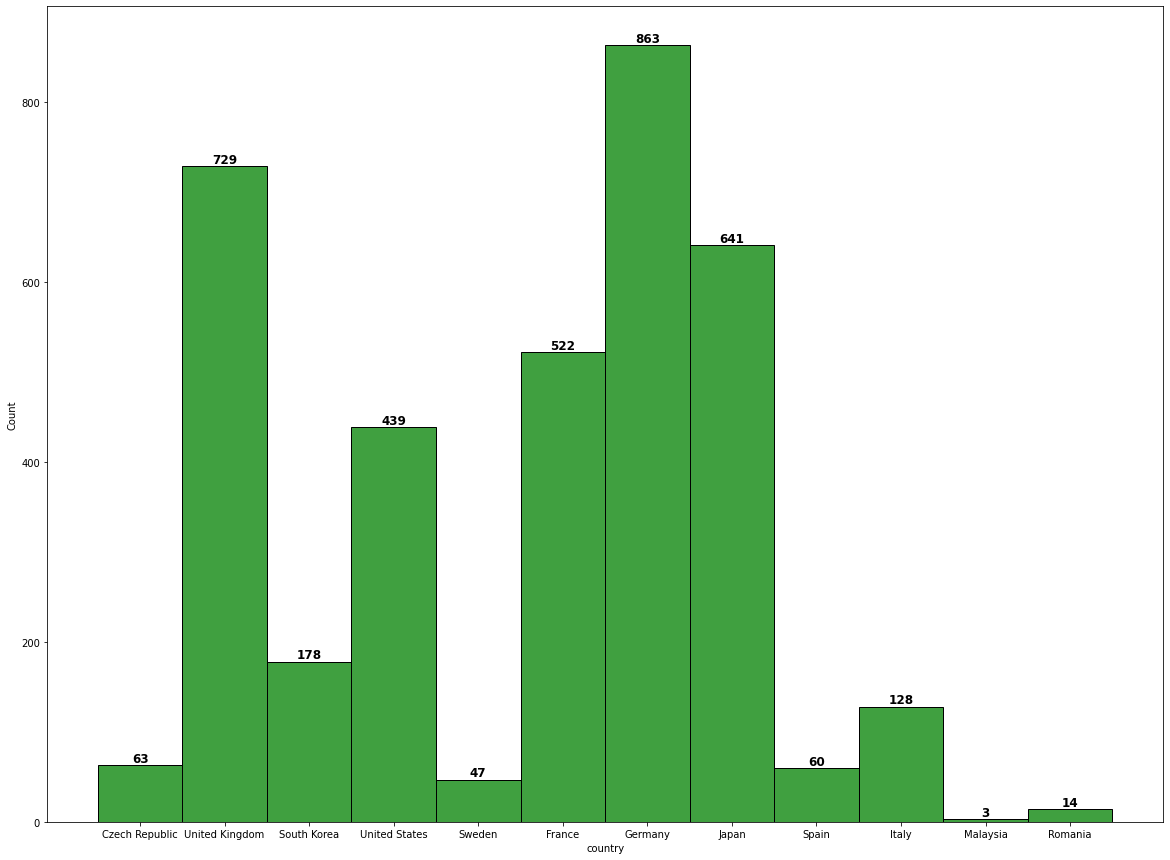

In [28]:
plt.figure(figsize=(20,15))

ax = sns.histplot(data=car_brand_merge['country'], color='green')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')


plt.show()

### 기어

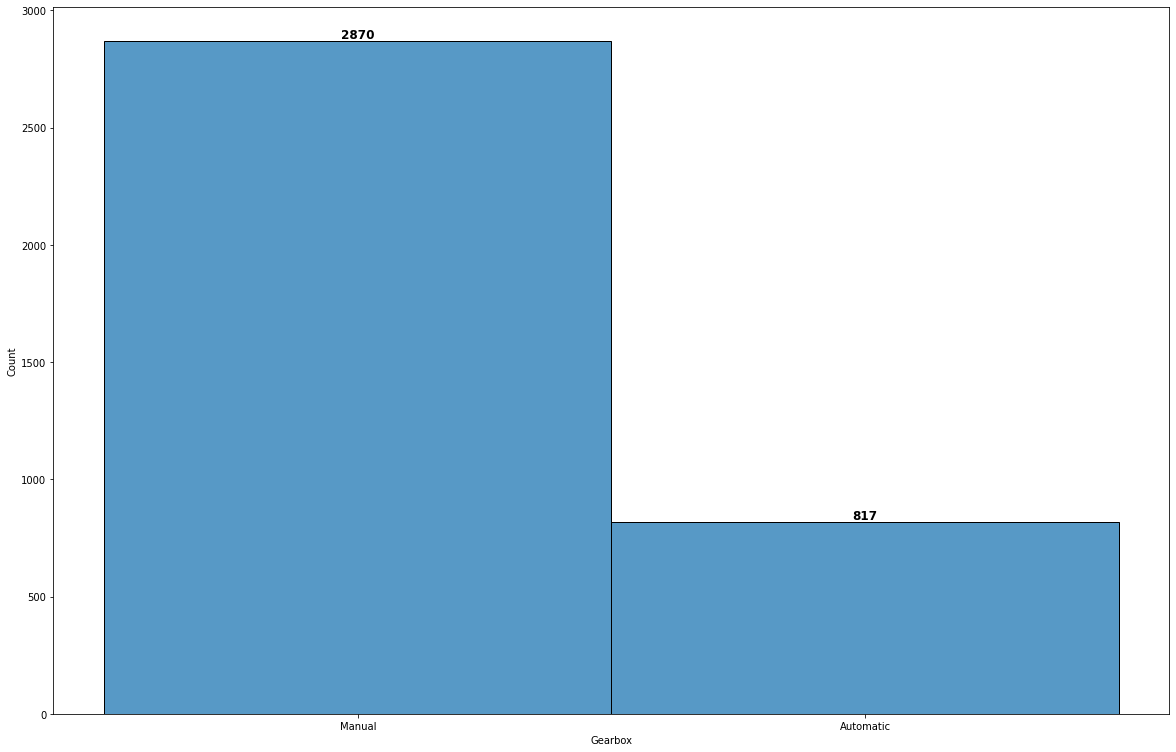

In [29]:
plt.figure(figsize=(20,13))

ax = sns.histplot(data=car_brand_merge['Gearbox'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.show()

### 연료방식

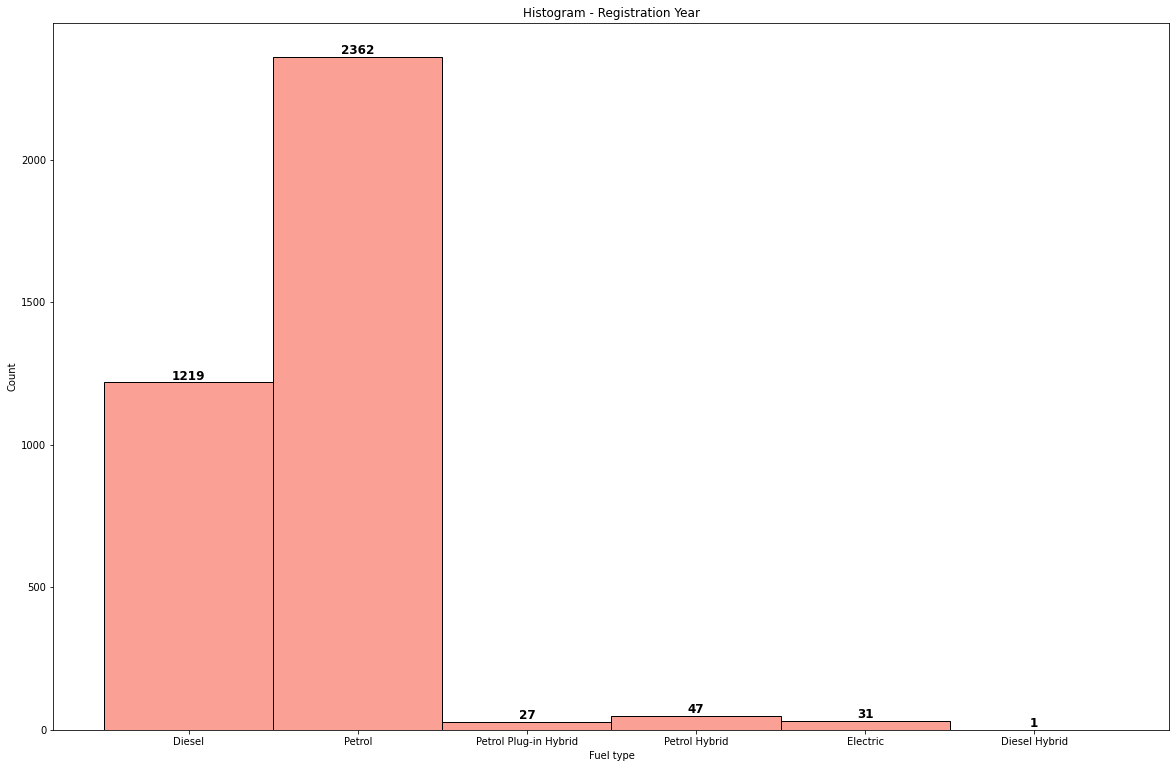

In [30]:
plt.figure(figsize=(20,13))

ax = sns.histplot(data=car_brand_merge['Fuel type'], color='salmon' )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
plt.title('Histogram - Registration Year')    
plt.show()

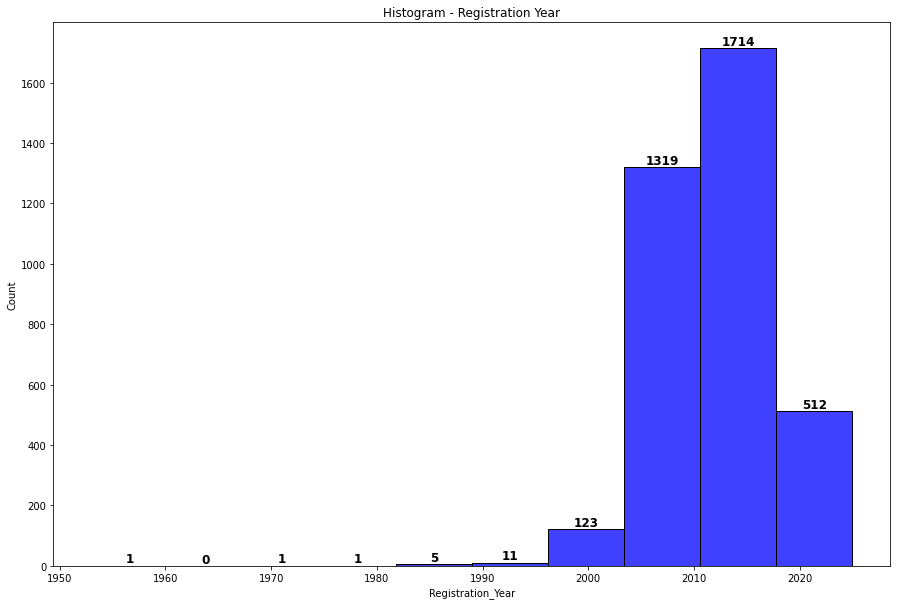

In [31]:
plt.figure(figsize=(15,10))

ax = sns.histplot(data=car_brand_merge, x='Registration_Year', bins=10, kde=False, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Histogram - Registration Year')

plt.show()

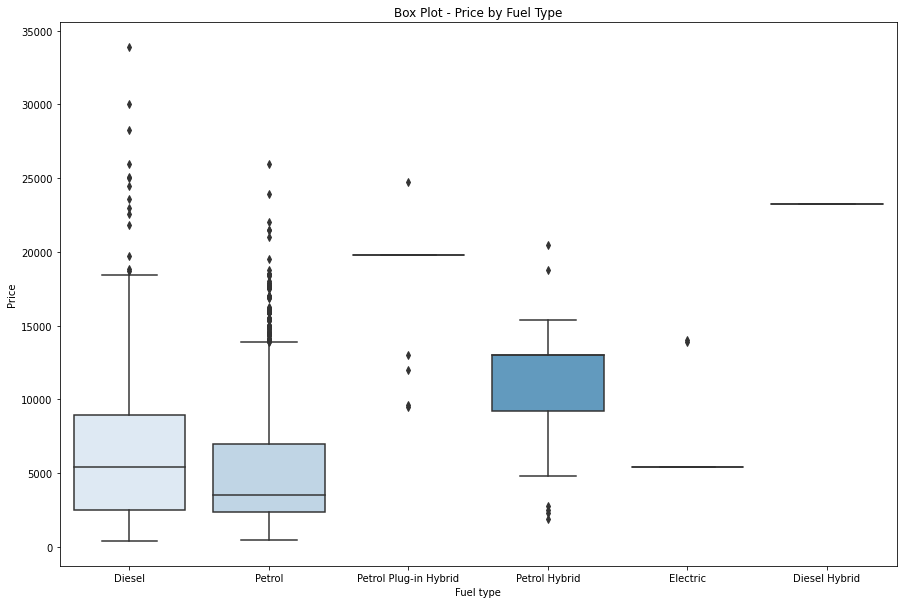

In [32]:
plt.figure(figsize=(15,10))

ax = sns.boxplot(x='Fuel type', y='Price', data=car_brand_merge, palette='Blues')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Box Plot - Price by Fuel Type')
plt.show()

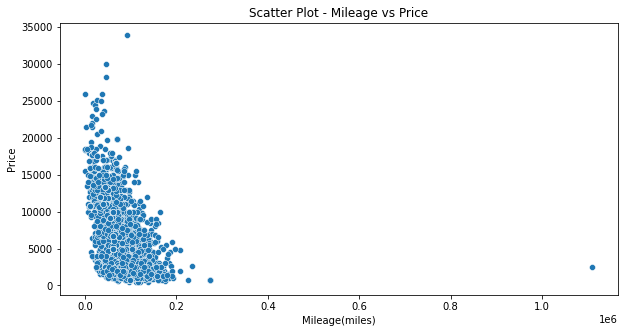

In [33]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='Mileage(miles)', y='Price', data=car_brand_merge, palette='viridis')
plt.title('Scatter Plot - Mileage vs Price')
plt.show()

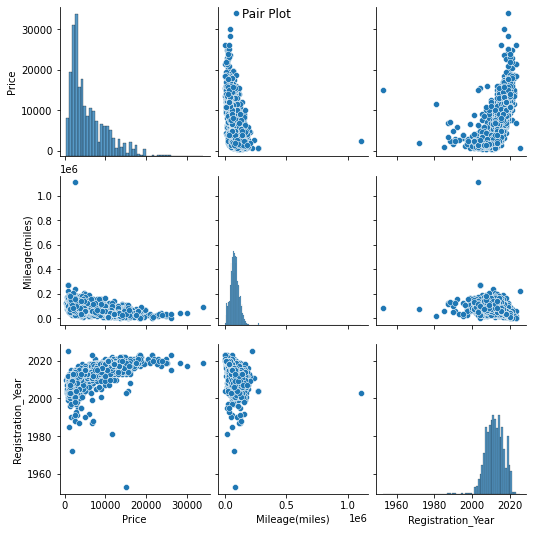

In [34]:
sns.pairplot(car_brand_merge[['Price', 'Mileage(miles)', 'Registration_Year']], palette='Set3')
plt.suptitle('Pair Plot')
plt.show()

차량의 좌석과 문의 개수는 영향을 미치지 않을 것 같아서 컬럼을 드랍하기로 결정
이전 소유자가 몇명인가도 중요하게 느껴지지 않았다.
중요한건 얼만큼 탔느냐, 언제나온 차량이 더 중요하다고 생각이 듬
그리고
마일수가 많은 차량 및 너무 오래전에 등록된 차량을 제거를 해봐야겠다

In [35]:
car_brand_merge.drop(['Seats','Doors','Previous Owners'], axis=1, inplace=True)

In [36]:
car_brand_merge.isna().mean() * 100

title                 0.000000
model                 0.000000
Price                 0.000000
Mileage(miles)        0.000000
Registration_Year     0.000000
Fuel type             0.000000
Body type             0.000000
Engine                1.220504
Gearbox               0.000000
Emission Class        2.359642
Service history      85.353946
country               0.000000
dtype: float64

In [37]:
car_brand_merge['Mileage(miles)'].max()

1110100

In [38]:
car_brand_merge

title   model  Price  Mileage(miles)  Registration_Year Fuel type  \
0        SKODA   FABIA   6900           70189               2016    Diesel   
1     VAUXHALL   CORSA   1495           88585               2008    Petrol   
2      HYUNDAI     I30    949          137000               2011    Petrol   
3         MINI   HATCH   2395           96731               2010    Petrol   
4     VAUXHALL   CORSA   1000           85000               2013    Diesel   
...        ...     ...    ...             ...                ...       ...   
3682   RENAULT  MEGANE   1395           76202               2006    Petrol   
3683      AUDI      A4   6990          119000               2012    Petrol   
3684       BMW       3   3995          139000               2013    Diesel   
3685     HONDA  ACCORD   1390          179190               2007    Diesel   
3686  VAUXHALL   CORSA   2000           82160               2013    Petrol   

      Body type Engine Gearbox Emission Class Service history         country  
0     Hatchback   1.4L  Manual         Euro 6             NaN  Czech Republic  
1     Hatchback   1.2L  Manual         Euro 4            Full  United Kingdom  
2     Hatchback   1.4L  Manual         Euro 5             NaN     South Korea  
3     Hatchback   1.4L  Manual         Euro 4            Full  United Kingdom  
4     Hatchback   1.3L  Manual         Euro 5             NaN  United Kingdom  
...         ...    ...     ...            ...             ...             ...  
3682  Hatchback   1.6L  Manual         Euro 4             NaN          France  
3683     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3684     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3685     Estate   2.2L  Manual         Euro 4            Full           Japan  
3686  Hatchback   1.2L  Manual         Euro 5             NaN  United Kingdom  

[3687 rows x 12 columns]

In [39]:
car_brand_merge = car_brand_merge[(car_brand_merge['Mileage(miles)']) != 1110100]

In [40]:
car_brand_merge

title   model  Price  Mileage(miles)  Registration_Year Fuel type  \
0        SKODA   FABIA   6900           70189               2016    Diesel   
1     VAUXHALL   CORSA   1495           88585               2008    Petrol   
2      HYUNDAI     I30    949          137000               2011    Petrol   
3         MINI   HATCH   2395           96731               2010    Petrol   
4     VAUXHALL   CORSA   1000           85000               2013    Diesel   
...        ...     ...    ...             ...                ...       ...   
3682   RENAULT  MEGANE   1395           76202               2006    Petrol   
3683      AUDI      A4   6990          119000               2012    Petrol   
3684       BMW       3   3995          139000               2013    Diesel   
3685     HONDA  ACCORD   1390          179190               2007    Diesel   
3686  VAUXHALL   CORSA   2000           82160               2013    Petrol   

      Body type Engine Gearbox Emission Class Service history         country  
0     Hatchback   1.4L  Manual         Euro 6             NaN  Czech Republic  
1     Hatchback   1.2L  Manual         Euro 4            Full  United Kingdom  
2     Hatchback   1.4L  Manual         Euro 5             NaN     South Korea  
3     Hatchback   1.4L  Manual         Euro 4            Full  United Kingdom  
4     Hatchback   1.3L  Manual         Euro 5             NaN  United Kingdom  
...         ...    ...     ...            ...             ...             ...  
3682  Hatchback   1.6L  Manual         Euro 4             NaN          France  
3683     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3684     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3685     Estate   2.2L  Manual         Euro 4            Full           Japan  
3686  Hatchback   1.2L  Manual         Euro 5             NaN  United Kingdom  

[3686 rows x 12 columns]

In [41]:
car_brand_merge[['Registration_Year']].value_counts() # 우연찮게 2025년 이라는 결측치도 발견

Registration_Year
2011                 289
2014                 287
2012                 275
2010                 271
2009                 251
2016                 246
2007                 246
2013                 243
2008                 226
2019                 211
2015                 210
2017                 164
2006                 149
2020                 106
2005                 104
2018                  95
2021                  85
2004                  72
2003                  52
2002                  30
2001                  25
2022                   8
2023                   6
1999                   5
2000                   4
1990                   3
1997                   3
1998                   3
1995                   3
1991                   2
1988                   2
1987                   2
1953                   1
1972                   1
1996                   1
1993                   1
1992                   1
1985                   1
1981                   1
2025   

In [42]:
car_brand_merge[(car_brand_merge['Registration_Year'] < 1990)]

title    model  Price  Mileage(miles)  Registration_Year Fuel type  \
237           MG   MIDGET   1875           75043               1972    Petrol   
1173  VOLKSWAGEN     GOLF   2500          124000               1988    Petrol   
1195     PORSCHE      944   6750          121000               1987    Petrol   
1239      NISSAN    SUNNY    999           60000               1985    Petrol   
1353         BMW        3   3495          115000               1987    Petrol   
2375      MARCOS  MARTINA  11495           19000               1981    Petrol   
3024     LAGONDA      LG6  14995           84000               1953    Petrol   
3116  VOLKSWAGEN     GOLF   7000          130000               1988    Petrol   

        Body type Engine    Gearbox Emission Class Service history  \
237   Convertible   1.3L     Manual            NaN             NaN   
1173    Hatchback   1.8L  Automatic            NaN             NaN   
1195        Coupe   2.5L     Manual            NaN             NaN   
1239       Saloon   1.3L     Manual            NaN             NaN   
1353       Saloon   1.8L  Automatic            NaN             NaN   
2375  Convertible   2.0L     Manual            NaN             NaN   
3024       Saloon   2.6L     Manual            NaN             NaN   
3116  Convertible   1.8L     Manual            NaN             NaN   

             country  
237   United Kingdom  
1173         Germany  
1195         Germany  
1239           Japan  
1353         Germany  
2375  United Kingdom  
3024  United Kingdom  
3116         Germany

In [43]:
car_brand_merge[(car_brand_merge['Registration_Year'] < 1990) | (car_brand_merge['Registration_Year'] == 2025)]

title    model  Price  Mileage(miles)  Registration_Year Fuel type  \
8          VOLVO      740    750          225318               2025    Petrol   
237           MG   MIDGET   1875           75043               1972    Petrol   
1173  VOLKSWAGEN     GOLF   2500          124000               1988    Petrol   
1195     PORSCHE      944   6750          121000               1987    Petrol   
1239      NISSAN    SUNNY    999           60000               1985    Petrol   
1353         BMW        3   3495          115000               1987    Petrol   
2375      MARCOS  MARTINA  11495           19000               1981    Petrol   
3024     LAGONDA      LG6  14995           84000               1953    Petrol   
3116  VOLKSWAGEN     GOLF   7000          130000               1988    Petrol   

        Body type Engine    Gearbox Emission Class Service history  \
8          Estate   2.3L  Automatic            NaN             NaN   
237   Convertible   1.3L     Manual            NaN             NaN   
1173    Hatchback   1.8L  Automatic            NaN             NaN   
1195        Coupe   2.5L     Manual            NaN             NaN   
1239       Saloon   1.3L     Manual            NaN             NaN   
1353       Saloon   1.8L  Automatic            NaN             NaN   
2375  Convertible   2.0L     Manual            NaN             NaN   
3024       Saloon   2.6L     Manual            NaN             NaN   
3116  Convertible   1.8L     Manual            NaN             NaN   

             country  
8             Sweden  
237   United Kingdom  
1173         Germany  
1195         Germany  
1239           Japan  
1353         Germany  
2375  United Kingdom  
3024  United Kingdom  
3116         Germany

In [44]:
car_brand_merge = car_brand_merge[~((car_brand_merge['Registration_Year'] < 1990) | (car_brand_merge['Registration_Year'] == 2025))]
car_brand_merge

title   model  Price  Mileage(miles)  Registration_Year Fuel type  \
0        SKODA   FABIA   6900           70189               2016    Diesel   
1     VAUXHALL   CORSA   1495           88585               2008    Petrol   
2      HYUNDAI     I30    949          137000               2011    Petrol   
3         MINI   HATCH   2395           96731               2010    Petrol   
4     VAUXHALL   CORSA   1000           85000               2013    Diesel   
...        ...     ...    ...             ...                ...       ...   
3682   RENAULT  MEGANE   1395           76202               2006    Petrol   
3683      AUDI      A4   6990          119000               2012    Petrol   
3684       BMW       3   3995          139000               2013    Diesel   
3685     HONDA  ACCORD   1390          179190               2007    Diesel   
3686  VAUXHALL   CORSA   2000           82160               2013    Petrol   

      Body type Engine Gearbox Emission Class Service history         country  
0     Hatchback   1.4L  Manual         Euro 6             NaN  Czech Republic  
1     Hatchback   1.2L  Manual         Euro 4            Full  United Kingdom  
2     Hatchback   1.4L  Manual         Euro 5             NaN     South Korea  
3     Hatchback   1.4L  Manual         Euro 4            Full  United Kingdom  
4     Hatchback   1.3L  Manual         Euro 5             NaN  United Kingdom  
...         ...    ...     ...            ...             ...             ...  
3682  Hatchback   1.6L  Manual         Euro 4             NaN          France  
3683     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3684     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3685     Estate   2.2L  Manual         Euro 4            Full           Japan  
3686  Hatchback   1.2L  Manual         Euro 5             NaN  United Kingdom  

[3677 rows x 12 columns]

country 및 Gearbox groupby 해서 평균을 확인

In [45]:
car_brand_merge.groupby('country').mean()

Price  Mileage(miles)  Registration_Year
country                                                       
Czech Republic  5569.619048    83991.698413        2012.682540
France          5468.285441    73163.181992        2012.720307
Germany         7518.481352    89232.150350        2011.752914
Italy           4376.828125    72940.945312        2011.507812
Japan           5269.279688    82561.525000        2011.045312
Malaysia        2226.666667    52643.333333        2004.333333
Romania         7439.571429    39983.071429        2016.857143
South Korea     6275.904494    71944.410112        2013.258427
Spain           4880.266667    84648.966667        2012.083333
Sweden          3637.826087   132241.652174        2008.478261
United Kingdom  5413.327824    72636.973829        2012.276860
United States   4734.594533    86913.209567        2011.630979

In [46]:
car_brand_merge.groupby('Gearbox').mean()

Price  Mileage(miles)  Registration_Year
Gearbox                                                  
Automatic  7457.259533    87406.776138        2011.148831
Manual     5315.179120    79166.600908        2012.131285

국가별 브랜드 개수

In [47]:
car_brand_merge.groupby('country')['title'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     6
United States      5
Name: title, dtype: int64

In [48]:
car_brand_merge.isna().mean()

title                0.000000
model                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Fuel type            0.000000
Body type            0.000000
Engine               0.012238
Gearbox              0.000000
Emission Class       0.021213
Service history      0.853141
country              0.000000
dtype: float64

In [49]:
car_brand_merge[car_brand_merge['Engine'].isna()]

title    model  Price  Mileage(miles)  Registration_Year  \
679        BMW        3   4200           68060               2007   
835     TOYOTA     MARK   7500           77000               2021   
856     NISSAN    CUBIC   4500           47000               2007   
1087      AUDI       A1   7995           50500               2012   
1304     MAZDA   MAZDA6   1500          155670               2015   
1429      FORD    FOCUS   1895          109000               2009   
1533   CITROEN       C1   3900           71000               2015   
1619      FORD       KA   2490           68837               2007   
2022      AUDI       A3   5750          139225               2012   
2136    TOYOTA    PRIUS   8950           66000               2012   
2194     MAZDA    MX-30  13899           13865               2021   
2288    NISSAN     LEAF   5390           60695               2014   
2299    NISSAN     LEAF   5390           60695               2014   
2337    NISSAN     LEAF   5390           60695               2014   
2349    NISSAN     LEAF   5390           60695               2014   
2361    NISSAN     LEAF   5390           60695               2014   
2384    NISSAN     LEAF   5390           60695               2014   
2394    NISSAN     LEAF   5390           60695               2014   
2454    NISSAN     LEAF   5390           60695               2014   
2465    NISSAN     LEAF   5390           60695               2014   
2523      FIAT     500L   5250           79308               2015   
2573    NISSAN     LEAF   5390           60695               2014   
2584    NISSAN     LEAF   5390           60695               2014   
2645    NISSAN     LEAF   5390           60695               2014   
2655    NISSAN     LEAF   5390           60695               2014   
2675    NISSAN     LEAF   5390           60695               2014   
2694    NISSAN     LEAF   5390           60695               2014   
2711    NISSAN     LEAF   5390           60695               2014   
2719  VAUXHALL    ASTRA   5995           76000               2014   
2743    NISSAN     LEAF   5390           60695               2014   
2768    NISSAN     LEAF   5390           60695               2014   
2790    NISSAN     LEAF   5390           60695               2014   
2798    NISSAN     LEAF   5390           60695               2014   
2832    NISSAN     LEAF   5390           60695               2014   
3022    NISSAN     LEAF   5390           60695               2014   
3031  VAUXHALL   AMPERA   9499           65767               2014   
3034    NISSAN     LEAF   5390           60695               2014   
3035    NISSAN     LEAF   5390           60695               2014   
3067    NISSAN     LEAF   5390           60695               2014   
3075    NISSAN     LEAF   5390           60695               2014   
3098    NISSAN     LEAF   5390           60695               2014   
3109    NISSAN     LEAF   5390           60695               2014   
3199    NISSAN     LEAF   5390           60695               2014   
3572     ISUZU  TROOPER   2250          147700               2001   
3623  VAUXHALL    CORSA  13998           28045               2020   

                  Fuel type  Body type Engine    Gearbox Emission Class  \
679                  Petrol     Saloon    NaN  Automatic            NaN   
835                  Petrol     Saloon    NaN  Automatic            NaN   
856                  Petrol  Hatchback    NaN     Manual            NaN   
1087                 Petrol  Hatchback    NaN  Automatic            NaN   
1304                 Diesel     Estate    NaN     Manual            NaN   
1429                 Petrol  Hatchback    NaN     Manual            NaN   
1533                 Petrol  Hatchback    NaN     Manual            NaN   
1619                 Petrol  Hatchback    NaN     Manual            NaN   
2022                 Diesel  Hatchback    NaN  Automatic            NaN   
2136          Petrol Hybrid  Hatchback    NaN  Automatic            NaN   
2194     

In [50]:
car_brand_merge[car_brand_merge['Emission Class'].isna()]

title    model  Price  Mileage(miles)  Registration_Year  \
95          RENAULT  FLUENCE   2490           67104               2010   
163           HONDA  ODYSSEY   2449           88240               2012   
178   MERCEDES-BENZ      CLK   3995           70000               2009   
229   MERCEDES-BENZ      260   2995           57400               1991   
513          NISSAN  LAFESTA   3900           37000               2012   
...             ...      ...    ...             ...                ...   
3199         NISSAN     LEAF   5390           60695               2014   
3464         TOYOTA   CARINA   2450          120000               1991   
3572          ISUZU  TROOPER   2250          147700               2001   
3623       VAUXHALL    CORSA  13998           28045               2020   
3677          ROVER      800   3975           34000               1995   

     Fuel type  Body type Engine    Gearbox Emission Class Service history  \
95      Diesel     Saloon   1.5L     Manual            NaN             NaN   
163     Petrol        MPV   2.4L  Automatic            NaN             NaN   
178     Petrol      Coupe   2.0L  Automatic            NaN             NaN   
229     Petrol     Saloon   2.6L  Automatic            NaN             NaN   
513     Petrol        MPV   2.0L  Automatic            NaN             NaN   
...        ...        ...    ...        ...            ...             ...   
3199  Electric  Hatchback    NaN  Automatic            NaN             NaN   
3464    Petrol     Saloon   1.6L     Manual            NaN             NaN   
3572    Diesel        SUV    NaN  Automatic            NaN             NaN   
3623  Electric  Hatchback    NaN  Automatic            NaN             NaN   
3677    Petrol     Saloon   2.7L  Automatic            NaN             NaN   

             country  
95            France  
163            Japan  
178          Germany  
229          Germany  
513            Japan  
...              ...  
3199           Japan  
3464           Japan  
3572           Japan  
3623  United Kingdom  
3677  United Kingdom  

[78 rows x 12 columns]

In [51]:
len(car_brand_merge[car_brand_merge['Engine'].isna()]) + len(car_brand_merge[car_brand_merge['Emission Class'].isna()])

123

중고차에서 등급 과 엔진은 가격 선정에 중요한 요소라고 판단되어 NAN 값처리 엔진 데이터가 없으면 등급 데이터도 없음

In [52]:
car_brand_merge

title   model  Price  Mileage(miles)  Registration_Year Fuel type  \
0        SKODA   FABIA   6900           70189               2016    Diesel   
1     VAUXHALL   CORSA   1495           88585               2008    Petrol   
2      HYUNDAI     I30    949          137000               2011    Petrol   
3         MINI   HATCH   2395           96731               2010    Petrol   
4     VAUXHALL   CORSA   1000           85000               2013    Diesel   
...        ...     ...    ...             ...                ...       ...   
3682   RENAULT  MEGANE   1395           76202               2006    Petrol   
3683      AUDI      A4   6990          119000               2012    Petrol   
3684       BMW       3   3995          139000               2013    Diesel   
3685     HONDA  ACCORD   1390          179190               2007    Diesel   
3686  VAUXHALL   CORSA   2000           82160               2013    Petrol   

      Body type Engine Gearbox Emission Class Service history         country  
0     Hatchback   1.4L  Manual         Euro 6             NaN  Czech Republic  
1     Hatchback   1.2L  Manual         Euro 4            Full  United Kingdom  
2     Hatchback   1.4L  Manual         Euro 5             NaN     South Korea  
3     Hatchback   1.4L  Manual         Euro 4            Full  United Kingdom  
4     Hatchback   1.3L  Manual         Euro 5             NaN  United Kingdom  
...         ...    ...     ...            ...             ...             ...  
3682  Hatchback   1.6L  Manual         Euro 4             NaN          France  
3683     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3684     Saloon   2.0L  Manual         Euro 5             NaN         Germany  
3685     Estate   2.2L  Manual         Euro 4            Full           Japan  
3686  Hatchback   1.2L  Manual         Euro 5             NaN  United Kingdom  

[3677 rows x 12 columns]

In [53]:
car_brand_merge = car_brand_merge.dropna(subset=['Emission Class','Engine'])
car_brand_merge.isna().mean()

title                0.000000
model                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Fuel type            0.000000
Body type            0.000000
Engine               0.000000
Gearbox              0.000000
Emission Class       0.000000
Service history      0.851584
country              0.000000
dtype: float64

service history 채울 다른 아이디어가 떠오르지 않아 unknown로 처리

### Service history 결측치 채우기

In [54]:
car_brand_merge['Service history'].fillna('Unknown', inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [55]:
car_brand_merge.isna().mean()

title                0.0
model                0.0
Price                0.0
Mileage(miles)       0.0
Registration_Year    0.0
Fuel type            0.0
Body type            0.0
Engine               0.0
Gearbox              0.0
Emission Class       0.0
Service history      0.0
country              0.0
dtype: float64

In [56]:
car_brand_merge

title   model  Price  Mileage(miles)  Registration_Year Fuel type  \
0        SKODA   FABIA   6900           70189               2016    Diesel   
1     VAUXHALL   CORSA   1495           88585               2008    Petrol   
2      HYUNDAI     I30    949          137000               2011    Petrol   
3         MINI   HATCH   2395           96731               2010    Petrol   
4     VAUXHALL   CORSA   1000           85000               2013    Diesel   
...        ...     ...    ...             ...                ...       ...   
3682   RENAULT  MEGANE   1395           76202               2006    Petrol   
3683      AUDI      A4   6990          119000               2012    Petrol   
3684       BMW       3   3995          139000               2013    Diesel   
3685     HONDA  ACCORD   1390          179190               2007    Diesel   
3686  VAUXHALL   CORSA   2000           82160               2013    Petrol   

      Body type Engine Gearbox Emission Class Service history         country  
0     Hatchback   1.4L  Manual         Euro 6         Unknown  Czech Republic  
1     Hatchback   1.2L  Manual         Euro 4            Full  United Kingdom  
2     Hatchback   1.4L  Manual         Euro 5         Unknown     South Korea  
3     Hatchback   1.4L  Manual         Euro 4            Full  United Kingdom  
4     Hatchback   1.3L  Manual         Euro 5         Unknown  United Kingdom  
...         ...    ...     ...            ...             ...             ...  
3682  Hatchback   1.6L  Manual         Euro 4         Unknown          France  
3683     Saloon   2.0L  Manual         Euro 5         Unknown         Germany  
3684     Saloon   2.0L  Manual         Euro 5         Unknown         Germany  
3685     Estate   2.2L  Manual         Euro 4            Full           Japan  
3686  Hatchback   1.2L  Manual         Euro 5         Unknown  United Kingdom  

[3598 rows x 12 columns]

service history 컬럼도 불필요 할 것 같아서 제거

In [57]:
car_brand_merge.drop(['Service history'], axis=1, inplace=True)
car_brand_merge

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


title   model  Price  Mileage(miles)  Registration_Year Fuel type  \
0        SKODA   FABIA   6900           70189               2016    Diesel   
1     VAUXHALL   CORSA   1495           88585               2008    Petrol   
2      HYUNDAI     I30    949          137000               2011    Petrol   
3         MINI   HATCH   2395           96731               2010    Petrol   
4     VAUXHALL   CORSA   1000           85000               2013    Diesel   
...        ...     ...    ...             ...                ...       ...   
3682   RENAULT  MEGANE   1395           76202               2006    Petrol   
3683      AUDI      A4   6990          119000               2012    Petrol   
3684       BMW       3   3995          139000               2013    Diesel   
3685     HONDA  ACCORD   1390          179190               2007    Diesel   
3686  VAUXHALL   CORSA   2000           82160               2013    Petrol   

      Body type Engine Gearbox Emission Class         country  
0     Hatchback   1.4L  Manual         Euro 6  Czech Republic  
1     Hatchback   1.2L  Manual         Euro 4  United Kingdom  
2     Hatchback   1.4L  Manual         Euro 5     South Korea  
3     Hatchback   1.4L  Manual         Euro 4  United Kingdom  
4     Hatchback   1.3L  Manual         Euro 5  United Kingdom  
...         ...    ...     ...            ...             ...  
3682  Hatchback   1.6L  Manual         Euro 4          France  
3683     Saloon   2.0L  Manual         Euro 5         Germany  
3684     Saloon   2.0L  Manual         Euro 5         Germany  
3685     Estate   2.2L  Manual         Euro 4           Japan  
3686  Hatchback   1.2L  Manual         Euro 5  United Kingdom  

[3598 rows x 11 columns]

In [58]:
pd.get_dummies(car_brand_merge, columns=['Registration_Year','Fuel type','Body type','Engine','Gearbox','Emission Class','country'], drop_first=True)

title   model  Price  Mileage(miles)  Registration_Year_1993  \
0        SKODA   FABIA   6900           70189                       0   
1     VAUXHALL   CORSA   1495           88585                       0   
2      HYUNDAI     I30    949          137000                       0   
3         MINI   HATCH   2395           96731                       0   
4     VAUXHALL   CORSA   1000           85000                       0   
...        ...     ...    ...             ...                     ...   
3682   RENAULT  MEGANE   1395           76202                       0   
3683      AUDI      A4   6990          119000                       0   
3684       BMW       3   3995          139000                       0   
3685     HONDA  ACCORD   1390          179190                       0   
3686  VAUXHALL   CORSA   2000           82160                       0   

      Registration_Year_1995  Registration_Year_1996  Registration_Year_1997  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
3682                       0                       0                       0   
3683                       0                       0                       0   
3684                       0                       0                       0   
3685                       0                       0                       0   
3686                       0                       0                       0   

      Registration_Year_1998  Registration_Year_1999  ...  country_Germany  \
0                          0                       0  ...                0   
1                          0                       0  ...                0   
2                          0                       0  ...                0   
3                          0                       0  ...                0   
4                          0                       0  ...                0   
...                      ...                     ...  ...              ...   
3682                       0                       0  ...                0   
3683                       0                       0  ...                1   
3684                       0                       0  ...                1   
3685                       0                       0  ...                0   
3686                       0                       0  ...                0   

      country_Italy  country_Japan  country_Malaysia  country_Romania  \
0                 0              0                 0                0   
1                 0              0                 0                0   
2                 0              0                 0                0   
3                 0              0                 0                0   
4                 0              0                 0                0   
...             ...            ...               ...              ...   
3682              0              0                 0                0   
3683              0              0                 0                0   
3684              0              0                 0                0   
3685              0              1                 0                0   
3686              0              0                 0                0   

      country_South Korea  country_Spain  country_Sweden  \
0                       0              0               0   
1                       0              0               0   
2                       1              0               0   
3                       0              0               0   
4                       0              0               0 

In [59]:
car_brand_one_hot = pd.get_dummies(car_brand_merge, columns=['title','model','Registration_Year','Fuel type','Body type','Engine','Gearbox','Emission Class','country'], drop_first=True)
car_brand_one_hot

Price  Mileage(miles)  title_ALFA  title_AUDI  title_BMW  \
0      6900           70189           0           0          0   
1      1495           88585           0           0          0   
2       949          137000           0           0          0   
3      2395           96731           0           0          0   
4      1000           85000           0           0          0   
...     ...             ...         ...         ...        ...   
3682   1395           76202           0           0          0   
3683   6990          119000           0           1          0   
3684   3995          139000           0           0          1   
3685   1390          179190           0           0          0   
3686   2000           82160           0           0          0   

      title_CHEVROLET  title_CHRYSLER  title_CITROEN  title_DACIA  \
0                   0               0              0            0   
1                   0               0              0            0   
2                   0               0              0            0   
3                   0               0              0            0   
4                   0               0              0            0   
...               ...             ...            ...          ...   
3682                0               0              0            0   
3683                0               0              0            0   
3684                0               0              0            0   
3685                0               0              0            0   
3686                0               0              0            0   

      title_DAEWOO  ...  country_Germany  country_Italy  country_Japan  \
0                0  ...                0              0              0   
1                0  ...                0              0              0   
2                0  ...                0              0              0   
3                0  ...                0              0              0   
4                0  ...                0              0              0   
...            ...  ...              ...            ...            ...   
3682             0  ...                0              0              0   
3683             0  ...                1              0              0   
3684             0  ...                1              0              0   
3685             0  ...                0              0              1   
3686             0  ...                0              0              0   

      country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0                    0                0                    0              0   
1                    0                0                    0              0   
2                    0                0                    1              0   
3                    0                0                    0              0   
4                    0                0                    0              0   
...                ...              ...                  ...            ...   
3682                 0                0                    0              0   
3683                 0                0                    0              0   
3684                 0                0                    0              0   
3685                 0                0                    0              0   
3686                 0                0                    0              0   

      country_Sweden  country_United Kingdom  country_United States  
0                  0                       0                      0  
1                  0                       1                      0  
2                  0                       0                      0  
3                  0                       1                      0  
4                  0                       1                      0  
...              ...                     ...                    ...  
3682               0                       0            

In [60]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [61]:
ss.fit(car_brand_one_hot)

StandardScaler()

In [62]:
ss.transform(car_brand_one_hot)

array([[ 0.24597297, -0.31002364, -0.07090792, ..., -0.11380005,
        -0.49973942, -0.37181634],
       [-0.95194385,  0.20595956, -0.07090792, ..., -0.11380005,
         2.00104284, -0.37181634],
       [-1.0729545 ,  1.56393556, -0.07090792, ..., -0.11380005,
        -0.49973942, -0.37181634],
       ...,
       [-0.39786576,  1.62003289, -0.07090792, ..., -0.11380005,
        -0.49973942, -0.37181634],
       [-0.97521513,  2.74730864, -0.07090792, ..., -0.11380005,
        -0.49973942, -0.37181634],
       [-0.84002008,  0.0257469 , -0.07090792, ..., -0.11380005,
         2.00104284, -0.37181634]])

In [63]:
pd.DataFrame(ss.transform(car_brand_one_hot))

0         1         2         3         4       5         6    \
0     0.245973 -0.310024 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   
1    -0.951944  0.205960 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   
2    -1.072955  1.563936 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   
3    -0.752476  0.434444 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   
4    -1.061651  0.105405 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   
...        ...       ...       ...       ...       ...     ...       ...   
3593 -0.974107 -0.141367 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   
3594  0.265920  1.059060 -0.070908  4.879938 -0.281972 -0.0625 -0.037304   
3595 -0.397866  1.620033 -0.070908 -0.204921  3.546457 -0.0625 -0.037304   
3596 -0.975215  2.747309 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   
3597 -0.840020  0.025747 -0.070908 -0.204921 -0.281972 -0.0625 -0.037304   

           7       8         9    ...       442       443       444       445  \
0    -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282 -0.442881 -0.028888   
1    -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282 -0.442881 -0.028888   
2    -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282 -0.442881 -0.028888   
3    -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282 -0.442881 -0.028888   
4    -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282 -0.442881 -0.028888   
...        ...     ...       ...  ...       ...       ...       ...       ...   
3593 -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282 -0.442881 -0.028888   
3594 -0.163788 -0.0625 -0.016674  ...  1.807786 -0.191282 -0.442881 -0.028888   
3595 -0.163788 -0.0625 -0.016674  ...  1.807786 -0.191282 -0.442881 -0.028888   
3596 -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282  2.257943 -0.028888   
3597 -0.163788 -0.0625 -0.016674  ... -0.553163 -0.191282 -0.442881 -0.028888   

         446       447       448     449       450       451  
0    -0.0625 -0.228138 -0.129118 -0.1138 -0.499739 -0.371816  
1    -0.0625 -0.228138 -0.129118 -0.1138  2.001043 -0.371816  
2    -0.0625  4.383319 -0.129118 -0.1138 -0.499739 -0.371816  
3    -0.0625 -0.228138 -0.129118 -0.1138  2.001043 -0.371816  
4    -0.0625 -0.228138 -0.129118 -0.1138  2.001043 -0.371816  
...      ...       ...       ...     ...       ...       ...  
3593 -0.0625 -0.228138 -0.129118 -0.1138 -0.499739 -0.371816  
3594 -0.0625 -0.228138 -0.129118 -0.1138 -0.499739 -0.371816  
3595 -0.0625 -0.228138 -0.129118 -0.1138 -0.499739 -0.371816  
3596 -0.0625 -0.228138 -0.129118 -0.1138 -0.499739 -0.371816  
3597 -0.0625 -0.228138 -0.129118 -0.1138  2.001043 -0.371816  

[3598 rows x 452 columns]

In [64]:
ss_df = pd.DataFrame(ss.transform(car_brand_one_hot), columns = car_brand_one_hot.columns)
ss_df

Price  Mileage(miles)  title_ALFA  title_AUDI  title_BMW  \
0     0.245973       -0.310024   -0.070908   -0.204921  -0.281972   
1    -0.951944        0.205960   -0.070908   -0.204921  -0.281972   
2    -1.072955        1.563936   -0.070908   -0.204921  -0.281972   
3    -0.752476        0.434444   -0.070908   -0.204921  -0.281972   
4    -1.061651        0.105405   -0.070908   -0.204921  -0.281972   
...        ...             ...         ...         ...        ...   
3593 -0.974107       -0.141367   -0.070908   -0.204921  -0.281972   
3594  0.265920        1.059060   -0.070908    4.879938  -0.281972   
3595 -0.397866        1.620033   -0.070908   -0.204921   3.546457   
3596 -0.975215        2.747309   -0.070908   -0.204921  -0.281972   
3597 -0.840020        0.025747   -0.070908   -0.204921  -0.281972   

      title_CHEVROLET  title_CHRYSLER  title_CITROEN  title_DACIA  \
0             -0.0625       -0.037304      -0.163788      -0.0625   
1             -0.0625       -0.037304      -0.163788      -0.0625   
2             -0.0625       -0.037304      -0.163788      -0.0625   
3             -0.0625       -0.037304      -0.163788      -0.0625   
4             -0.0625       -0.037304      -0.163788      -0.0625   
...               ...             ...            ...          ...   
3593          -0.0625       -0.037304      -0.163788      -0.0625   
3594          -0.0625       -0.037304      -0.163788      -0.0625   
3595          -0.0625       -0.037304      -0.163788      -0.0625   
3596          -0.0625       -0.037304      -0.163788      -0.0625   
3597          -0.0625       -0.037304      -0.163788      -0.0625   

      title_DAEWOO  ...  country_Germany  country_Italy  country_Japan  \
0        -0.016674  ...        -0.553163      -0.191282      -0.442881   
1        -0.016674  ...        -0.553163      -0.191282      -0.442881   
2        -0.016674  ...        -0.553163      -0.191282      -0.442881   
3        -0.016674  ...        -0.553163      -0.191282      -0.442881   
4        -0.016674  ...        -0.553163      -0.191282      -0.442881   
...            ...  ...              ...            ...            ...   
3593     -0.016674  ...        -0.553163      -0.191282      -0.442881   
3594     -0.016674  ...         1.807786      -0.191282      -0.442881   
3595     -0.016674  ...         1.807786      -0.191282      -0.442881   
3596     -0.016674  ...        -0.553163      -0.191282       2.257943   
3597     -0.016674  ...        -0.553163      -0.191282      -0.442881   

      country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0            -0.028888          -0.0625            -0.228138      -0.129118   
1            -0.028888          -0.0625            -0.228138      -0.129118   
2            -0.028888          -0.0625             4.383319      -0.129118   
3            -0.028888          -0.0625            -0.228138      -0.129118   
4            -0.028888          -0.0625            -0.228138      -0.129118   
...                ...              ...                  ...            ...   
3593         -0.028888          -0.0625            -0.228138      -0.129118   
3594         -0.028888          -0.0625            -0.228138      -0.129118   
3595         -0.028888          -0.0625            -0.228138      -0.129118   
3596         -0.028888          -0.0625            -0.228138      -0.129118   
3597         -0.028888          -0.0625            -0.228138      -0.129118   

      country_Sweden  country_United Kingdom  country_United States  
0            -0.1138               -0.499739              -0.371816  
1            -0.1138                2.001043              -0.371816  
2            -0.1138               -0.499739              -0.371816  
3            -0.1138                2.001043              -0.371816  
4            -0.1138                2.001043              -0.371816  
...              ...                     ...                    ...  
3593         -0.1138   

standardscaler 데이터의 특성을 평균이 0이고 표준 편차가 1이 되도록 스케일링 표준 정규 분포로 변환하여 데이터의 스케일을 조정<br>
대부분 원핫인코딩한 컬럼들이 많다보니 같은값들이 많다.

In [65]:
rs.fit(car_brand_one_hot)

RobustScaler()

In [66]:
rs.transform(car_brand_one_hot)

array([[ 5.26502087e-01, -2.12285788e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.54619713e-01,  1.85758179e-01,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-5.53730260e-01,  1.23333910e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.16845162e-04,  1.27661416e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.73679434e-01,  2.14622642e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.62951534e-01,  4.67370608e-02,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [67]:
pd.DataFrame(rs.transform(car_brand_one_hot))

0         1    2    3    4    5    6    7    8    9    ...  442  \
0     0.526502 -0.212286  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1    -0.454620  0.185758  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2    -0.553730  1.233339  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3    -0.291251  0.362017  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4    -0.544473  0.108188  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3593 -0.472772 -0.082179  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3594  0.542839  0.843864  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   
3595 -0.000817  1.276614  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   
3596 -0.473679  2.146226  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3597 -0.362952  0.046737  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

      443  444  445  446  447  448  449  450  451  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
3593  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3594  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3595  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3596  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3597  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[3598 rows x 452 columns]

In [68]:
rs_df = pd.DataFrame(rs.transform(car_brand_one_hot), columns=car_brand_one_hot.columns)
rs_df

Price  Mileage(miles)  title_ALFA  title_AUDI  title_BMW  \
0     0.526502       -0.212286         0.0         0.0        0.0   
1    -0.454620        0.185758         0.0         0.0        0.0   
2    -0.553730        1.233339         0.0         0.0        0.0   
3    -0.291251        0.362017         0.0         0.0        0.0   
4    -0.544473        0.108188         0.0         0.0        0.0   
...        ...             ...         ...         ...        ...   
3593 -0.472772       -0.082179         0.0         0.0        0.0   
3594  0.542839        0.843864         0.0         1.0        0.0   
3595 -0.000817        1.276614         0.0         0.0        1.0   
3596 -0.473679        2.146226         0.0         0.0        0.0   
3597 -0.362952        0.046737         0.0         0.0        0.0   

      title_CHEVROLET  title_CHRYSLER  title_CITROEN  title_DACIA  \
0                 0.0             0.0            0.0          0.0   
1                 0.0             0.0            0.0          0.0   
2                 0.0             0.0            0.0          0.0   
3                 0.0             0.0            0.0          0.0   
4                 0.0             0.0            0.0          0.0   
...               ...             ...            ...          ...   
3593              0.0             0.0            0.0          0.0   
3594              0.0             0.0            0.0          0.0   
3595              0.0             0.0            0.0          0.0   
3596              0.0             0.0            0.0          0.0   
3597              0.0             0.0            0.0          0.0   

      title_DAEWOO  ...  country_Germany  country_Italy  country_Japan  \
0              0.0  ...              0.0            0.0            0.0   
1              0.0  ...              0.0            0.0            0.0   
2              0.0  ...              0.0            0.0            0.0   
3              0.0  ...              0.0            0.0            0.0   
4              0.0  ...              0.0            0.0            0.0   
...            ...  ...              ...            ...            ...   
3593           0.0  ...              0.0            0.0            0.0   
3594           0.0  ...              1.0            0.0            0.0   
3595           0.0  ...              1.0            0.0            0.0   
3596           0.0  ...              0.0            0.0            1.0   
3597           0.0  ...              0.0            0.0            0.0   

      country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0                  0.0              0.0                  0.0            0.0   
1                  0.0              0.0                  0.0            0.0   
2                  0.0              0.0                  1.0            0.0   
3                  0.0              0.0                  0.0            0.0   
4                  0.0              0.0                  0.0            0.0   
...                ...              ...                  ...            ...   
3593               0.0              0.0                  0.0            0.0   
3594               0.0              0.0                  0.0            0.0   
3595               0.0              0.0                  0.0            0.0   
3596               0.0              0.0                  0.0            0.0   
3597               0.0              0.0                  0.0            0.0   

      country_Sweden  country_United Kingdom  country_United States  
0                0.0                     0.0                    0.0  
1                0.0                     1.0                    0.0  
2                0.0                     0.0                    0.0  
3                0.0                     1.0                    0.0  
4                0.0                     1.0                    0.0  
...              ...                     ...                    ...  
3593             0.0   

Robuster 이상치에 영향을 받지 않고 데이터를 스케일링하는 데 사용되는 스케일러<br>
생각지도 못한 이상치들을 잘 처리 해줬을 것 같은데
컬럼이 많고 하다보니 제대로 해석을 못하겠다

In [69]:
mm.fit(car_brand_one_hot)

MinMaxScaler()

In [70]:
mm.transform(car_brand_one_hot)

array([[0.19402985, 0.25606806, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03268657, 0.3231825 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01638806, 0.49981576, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10731343, 0.50711239, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02955224, 0.65373825, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04776119, 0.29974206, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [71]:
pd.DataFrame(mm.transform(car_brand_one_hot))

0         1    2    3    4    5    6    7    8    9    ...  442  \
0     0.194030  0.256068  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1     0.032687  0.323182  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2     0.016388  0.499816  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3     0.059552  0.352902  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4     0.017910  0.310103  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3593  0.029701  0.278005  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3594  0.196716  0.434146  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   
3595  0.107313  0.507112  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0   
3596  0.029552  0.653738  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3597  0.047761  0.299742  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

      443  444  445  446  447  448  449  450  451  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
3593  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3594  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3595  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3596  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3597  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[3598 rows x 452 columns]

In [72]:
mm_df = pd.DataFrame(mm.transform(car_brand_one_hot), columns=car_brand_one_hot.columns)
mm_df

Price  Mileage(miles)  title_ALFA  title_AUDI  title_BMW  \
0     0.194030        0.256068         0.0         0.0        0.0   
1     0.032687        0.323182         0.0         0.0        0.0   
2     0.016388        0.499816         0.0         0.0        0.0   
3     0.059552        0.352902         0.0         0.0        0.0   
4     0.017910        0.310103         0.0         0.0        0.0   
...        ...             ...         ...         ...        ...   
3593  0.029701        0.278005         0.0         0.0        0.0   
3594  0.196716        0.434146         0.0         1.0        0.0   
3595  0.107313        0.507112         0.0         0.0        1.0   
3596  0.029552        0.653738         0.0         0.0        0.0   
3597  0.047761        0.299742         0.0         0.0        0.0   

      title_CHEVROLET  title_CHRYSLER  title_CITROEN  title_DACIA  \
0                 0.0             0.0            0.0          0.0   
1                 0.0             0.0            0.0          0.0   
2                 0.0             0.0            0.0          0.0   
3                 0.0             0.0            0.0          0.0   
4                 0.0             0.0            0.0          0.0   
...               ...             ...            ...          ...   
3593              0.0             0.0            0.0          0.0   
3594              0.0             0.0            0.0          0.0   
3595              0.0             0.0            0.0          0.0   
3596              0.0             0.0            0.0          0.0   
3597              0.0             0.0            0.0          0.0   

      title_DAEWOO  ...  country_Germany  country_Italy  country_Japan  \
0              0.0  ...              0.0            0.0            0.0   
1              0.0  ...              0.0            0.0            0.0   
2              0.0  ...              0.0            0.0            0.0   
3              0.0  ...              0.0            0.0            0.0   
4              0.0  ...              0.0            0.0            0.0   
...            ...  ...              ...            ...            ...   
3593           0.0  ...              0.0            0.0            0.0   
3594           0.0  ...              1.0            0.0            0.0   
3595           0.0  ...              1.0            0.0            0.0   
3596           0.0  ...              0.0            0.0            1.0   
3597           0.0  ...              0.0            0.0            0.0   

      country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0                  0.0              0.0                  0.0            0.0   
1                  0.0              0.0                  0.0            0.0   
2                  0.0              0.0                  1.0            0.0   
3                  0.0              0.0                  0.0            0.0   
4                  0.0              0.0                  0.0            0.0   
...                ...              ...                  ...            ...   
3593               0.0              0.0                  0.0            0.0   
3594               0.0              0.0                  0.0            0.0   
3595               0.0              0.0                  0.0            0.0   
3596               0.0              0.0                  0.0            0.0   
3597               0.0              0.0                  0.0            0.0   

      country_Sweden  country_United Kingdom  country_United States  
0                0.0                     0.0                    0.0  
1                0.0                     1.0                    0.0  
2                0.0                     0.0                    0.0  
3                0.0                     1.0                    0.0  
4                0.0                     1.0                    0.0  
...              ...                     ...                    ...  
3593             0.0   

minmaxscaler 0,1 범위로 특성을 변환
title 컬럼부터 0과 1가 대부분이다


In [73]:
ss_df.describe()

Price  Mileage(miles)    title_ALFA    title_AUDI     title_BMW  \
count  3.598000e+03    3.598000e+03  3.598000e+03  3.598000e+03  3.598000e+03   
mean   9.479169e-17   -6.319446e-17  3.159723e-17 -4.344619e-17  3.554689e-17   
std    1.000139e+00    1.000139e+00  1.000139e+00  1.000139e+00  1.000139e+00   
min   -1.194630e+00   -2.278703e+00 -7.090792e-02 -2.049206e-01 -2.819715e-01   
25%   -7.314208e-01   -6.804062e-01 -7.090792e-02 -2.049206e-01 -2.819715e-01   
50%   -3.968684e-01   -3.483821e-02 -7.090792e-02 -2.049206e-01 -2.819715e-01   
75%    4.895457e-01    6.158908e-01 -7.090792e-02 -2.049206e-01 -2.819715e-01   
max    6.230016e+00    5.409407e+00  1.410280e+01  4.879938e+00  3.546457e+00   

       title_CHEVROLET  title_CHRYSLER  title_CITROEN   title_DACIA  \
count     3.598000e+03    3.598000e+03   3.598000e+03  3.598000e+03   
mean      9.874135e-18    9.874135e-18   1.974827e-17  1.283638e-17   
std       1.000139e+00    1.000139e+00   1.000139e+00  1.000139e+00   
min      -6.250000e-02   -3.730409e-02  -1.637879e-01 -6.250000e-02   
25%      -6.250000e-02   -3.730409e-02  -1.637879e-01 -6.250000e-02   
50%      -6.250000e-02   -3.730409e-02  -1.637879e-01 -6.250000e-02   
75%      -6.250000e-02   -3.730409e-02  -1.637879e-01 -6.250000e-02   
max       1.600000e+01    2.680672e+01   6.105456e+00  1.600000e+01   

       title_DAEWOO  ...  country_Germany  country_Italy  country_Japan  \
count  3.598000e+03  ...     3.598000e+03   3.598000e+03   3.598000e+03   
mean  -5.924481e-18  ...    -9.874135e-18   8.047420e-17   5.529515e-17   
std    1.000139e+00  ...     1.000139e+00   1.000139e+00   1.000139e+00   
min   -1.667362e-02  ...    -5.531628e-01  -1.912822e-01  -4.428810e-01   
25%   -1.667362e-02  ...    -5.531628e-01  -1.912822e-01  -4.428810e-01   
50%   -1.667362e-02  ...    -5.531628e-01  -1.912822e-01  -4.428810e-01   
75%   -1.667362e-02  ...    -5.531628e-01  -1.912822e-01  -4.428810e-01   
max    5.997499e+01  ...     1.807786e+00   5.227878e+00   2.257943e+00   

       country_Malaysia  country_Romania  country_South Korea  country_Spain  \
count      3.598000e+03     3.598000e+03         3.598000e+03   3.598000e+03   
mean       2.764758e-17     1.283638e-17        -7.109377e-17   5.924481e-17   
std        1.000139e+00     1.000139e+00         1.000139e+00   1.000139e+00   
min       -2.888758e-02    -6.250000e-02        -2.281376e-01  -1.291177e-01   
25%       -2.888758e-02    -6.250000e-02        -2.281376e-01  -1.291177e-01   
50%       -2.888758e-02    -6.250000e-02        -2.281376e-01  -1.291177e-01   
75%       -2.888758e-02    -6.250000e-02        -2.281376e-01  -1.291177e-01   
max        3.461695e+01     1.600000e+01         4.383319e+00   7.744873e+00   

       country_Sweden  country_United Kingdom  country_United States  
count    3.598000e+03            3.598000e+03           3.598000e+03  
mean    -1.086155e-17           -3.159723e-17           3.949654e-17  
std      1.000139e+00            1.000139e+00           1.000139e+00  
min     -1.138000e-01           -4.997394e-01          -3.718163e-01  
25%     -1.138000e-01           -4.997394e-01          -3.718163e-01  
50%     -1.138000e-01           -4.997394e-01          -3.718163e-01  
75%     -1.138000e-01           -4.997394e-01          -3.718163e-01  
max      8.787343e+00            2.001043e+00           2.689500e+00  

[8 rows x 452 columns]

In [74]:
rs_df.describe()

Price  Mileage(miles)   title_ALFA  title_AUDI    title_BMW  \
count  3598.000000     3598.000000  3598.000000  3598.00000  3598.000000   
mean      0.325044        0.026875     0.005003     0.04030     0.073652   
std       0.819137        0.771535     0.070563     0.19669     0.261240   
min      -0.653385       -1.730981     0.000000     0.00000     0.000000   
25%      -0.274006       -0.498009     0.000000     0.00000     0.000000   
50%       0.000000        0.000000     0.000000     0.00000     0.000000   
75%       0.725994        0.501991     0.000000     0.00000     0.000000   
max       5.427573        4.199844     1.000000     1.00000     1.000000   

       title_CHEVROLET  title_CHRYSLER  title_CITROEN  title_DACIA  \
count      3598.000000     3598.000000    3598.000000  3598.000000   
mean          0.003891        0.001390       0.026126     0.003891   
std           0.062265        0.037257       0.159531     0.062265   
min           0.000000        0.000000       0.000000     0.000000   
25%           0.000000        0.000000       0.000000     0.000000   
50%           0.000000        0.000000       0.000000     0.000000   
75%           0.000000        0.000000       0.000000     0.000000   
max           1.000000        1.000000       1.000000     1.000000   

       title_DAEWOO  ...  country_Germany  country_Italy  country_Japan  \
count   3598.000000  ...      3598.000000    3598.000000    3598.000000   
mean       0.000278  ...         0.234297       0.035297       0.163980   
std        0.016671  ...         0.423617       0.184556       0.370309   
min        0.000000  ...         0.000000       0.000000       0.000000   
25%        0.000000  ...         0.000000       0.000000       0.000000   
50%        0.000000  ...         0.000000       0.000000       0.000000   
75%        0.000000  ...         0.000000       0.000000       0.000000   
max        1.000000  ...         1.000000       1.000000       1.000000   

       country_Malaysia  country_Romania  country_South Korea  country_Spain  \
count       3598.000000      3598.000000          3598.000000    3598.000000   
mean           0.000834         0.003891             0.049472       0.016398   
std            0.028868         0.062265             0.216881       0.127018   
min            0.000000         0.000000             0.000000       0.000000   
25%            0.000000         0.000000             0.000000       0.000000   
50%            0.000000         0.000000             0.000000       0.000000   
75%            0.000000         0.000000             0.000000       0.000000   
max            1.000000         1.000000             1.000000       1.000000   

       country_Sweden  country_United Kingdom  country_United States  
count     3598.000000             3598.000000            3598.000000  
mean         0.012785                0.199833               0.121456  
std          0.112361                0.399930               0.326702  
min          0.000000                0.000000               0.000000  
25%          0.000000                0.000000               0.000000  
50%          0.000000                0.000000               0.000000  
75%          0.000000                0.000000               0.000000  
max          1.000000                1.000000               1.000000  

[8 rows x 452 columns]

In [75]:
mm_df.describe()

Price  Mileage(miles)   title_ALFA  title_AUDI    title_BMW  \
count  3598.000000     3598.000000  3598.000000  3598.00000  3598.000000   
mean      0.160901        0.296393     0.005003     0.04030     0.073652   
std       0.134705        0.130089     0.070563     0.19669     0.261240   
min       0.000000        0.000000     0.000000     0.00000     0.000000   
25%       0.062388        0.207892     0.000000     0.00000     0.000000   
50%       0.107448        0.291862     0.000000     0.00000     0.000000   
75%       0.226836        0.376503     0.000000     0.00000     0.000000   
max       1.000000        1.000000     1.000000     1.00000     1.000000   

       title_CHEVROLET  title_CHRYSLER  title_CITROEN  title_DACIA  \
count      3598.000000     3598.000000    3598.000000  3598.000000   
mean          0.003891        0.001390       0.026126     0.003891   
std           0.062265        0.037257       0.159531     0.062265   
min           0.000000        0.000000       0.000000     0.000000   
25%           0.000000        0.000000       0.000000     0.000000   
50%           0.000000        0.000000       0.000000     0.000000   
75%           0.000000        0.000000       0.000000     0.000000   
max           1.000000        1.000000       1.000000     1.000000   

       title_DAEWOO  ...  country_Germany  country_Italy  country_Japan  \
count   3598.000000  ...      3598.000000    3598.000000    3598.000000   
mean       0.000278  ...         0.234297       0.035297       0.163980   
std        0.016671  ...         0.423617       0.184556       0.370309   
min        0.000000  ...         0.000000       0.000000       0.000000   
25%        0.000000  ...         0.000000       0.000000       0.000000   
50%        0.000000  ...         0.000000       0.000000       0.000000   
75%        0.000000  ...         0.000000       0.000000       0.000000   
max        1.000000  ...         1.000000       1.000000       1.000000   

       country_Malaysia  country_Romania  country_South Korea  country_Spain  \
count       3598.000000      3598.000000          3598.000000    3598.000000   
mean           0.000834         0.003891             0.049472       0.016398   
std            0.028868         0.062265             0.216881       0.127018   
min            0.000000         0.000000             0.000000       0.000000   
25%            0.000000         0.000000             0.000000       0.000000   
50%            0.000000         0.000000             0.000000       0.000000   
75%            0.000000         0.000000             0.000000       0.000000   
max            1.000000         1.000000             1.000000       1.000000   

       country_Sweden  country_United Kingdom  country_United States  
count     3598.000000             3598.000000            3598.000000  
mean         0.012785                0.199833               0.121456  
std          0.112361                0.399930               0.326702  
min          0.000000                0.000000               0.000000  
25%          0.000000                0.000000               0.000000  
50%          0.000000                0.000000               0.000000  
75%          0.000000                0.000000               0.000000  
max          1.000000                1.000000               1.000000  

[8 rows x 452 columns]

In [76]:
pca = PCA()

In [77]:
pca.fit(car_brand_one_hot)

PCA()

In [78]:
pd.DataFrame(pca.transform(car_brand_one_hot))

0            1         2         3         4         5    \
0    -11103.795696   328.096617 -0.357153 -0.124800 -0.207633  0.270058   
1      7627.384259 -3766.990686 -0.902743 -0.174758  1.263280  0.052399   
2     55960.479566  -899.545926 -0.192867 -0.915268 -0.286531 -0.524577   
3     15689.700890 -2295.132460 -0.769825 -0.003140  0.639743 -0.062966   
4      4086.183942 -4513.415589  0.266754 -1.203891  0.705128  0.192449   
...            ...          ...       ...       ...       ...       ...   
3593  -4717.777673 -4739.444133 -0.260960  0.556841 -0.429107  0.472041   
3594  37579.492337  3857.868301  0.915124 -0.251972  0.227906 -0.717261   
3595  57740.837189  2279.831986  1.324013 -0.138153  0.265474 -0.400905   
3596  98014.493779  2513.732618 -0.530709  0.559688  0.010989  0.788676   
3597   1182.769807 -3716.053510 -0.126064 -1.352100  0.913472 -0.241294   

           6         7         8         9    ...           442           443  \
0    -0.213876 -0.444525 -0.866887 -0.073348  ... -2.603169e-16 -5.551115e-17   
1    -0.056597  0.008161  0.019367  0.486945  ... -4.683753e-17 -7.632783e-17   
2     0.430351 -0.259811  0.248734 -0.014735  ...  5.898060e-17  3.330669e-16   
3     0.054067 -0.077962  0.056578 -0.225933  ...  1.734723e-18  1.526557e-16   
4    -0.149357  0.287178 -0.717972 -0.180913  ...  5.724587e-17 -9.020562e-17   
...        ...       ...       ...       ...  ...           ...           ...   
3593 -0.271382 -0.742845  0.416675 -0.227506  ... -8.586881e-17  2.706169e-16   
3594  0.043602 -0.043747  0.271167  0.188279  ...  7.806256e-18  5.273559e-16   
3595 -0.315669 -0.056913 -0.461838  0.173429  ...  1.318390e-16  2.775558e-17   
3596  0.724203  0.109380 -0.350984  0.080284  ... -2.385245e-17 -1.734723e-16   
3597  0.153534  0.069037  0.027318  0.392267  ... -2.515349e-17 -1.179612e-16   

               444           445           446           447           448  \
0    -6.938894e-17  6.245005e-17 -2.463307e-16 -1.665335e-16  3.191891e-16   
1    -1.595946e-16 -2.775558e-16  5.551115e-17  1.110223e-16 -1.249001e-16   
2    -6.661338e-16 -8.326673e-17  1.665335e-16  1.769418e-16 -8.326673e-17   
3    -2.775558e-17 -1.387779e-16 -5.551115e-17  5.551115e-17 -1.804112e-16   
4     1.387779e-16 -2.775558e-17 -8.326673e-17 -4.163336e-17 -8.326673e-17   
...            ...           ...           ...           ...           ...   
3593  6.245005e-17  1.387779e-17 -8.326673e-17 -1.526557e-16  2.775558e-17   
3594  1.387779e-16  8.326673e-17  4.579670e-16  1.942890e-16 -8.326673e-17   
3595 -3.053113e-16  1.942890e-16  2.636780e-16  6.938894e-17 -8.326673e-17   
3596 -7.910339e-16  2.289835e-16 -1.179612e-16  1.882175e-16  1.942890e-16   
3597 -8.326673e-17  1.665335e-16  1.110223e-16  1.942890e-16 -9.714451e-17   

               449           450           451  
0     1.318390e-16  1.249001e-16  1.734723e-18  
1     0.000000e+00  1.110223e-16  3.642919e-17  
2     2.567391e-16 -3.989864e-16  1.665335e-16  
3    -1.942890e-16 -2.636780e-16  3.027092e-16  
4     4.857226e-17 -2.220446e-16 -1.561251e-17  
...            ...           ...           ...  
3593 -1.491862e-16  0.000000e+00 -1.387779e-16  
3594  3.469447e-17  5.204170e-17  1.110223e-16  
3595  3.885781e-16 -7.285839e-17  1.526557e-16  
3596  3.816392e-17  3.538836e-16  2.775558e-17  
3597 -2.289835e-16 -7.632783e-17  3.642919e-17  

[3598 rows x 452 columns]

In [79]:
pca=PCA(5)

In [80]:
pd.DataFrame(pca.fit_transform(car_brand_one_hot), columns = ['PC1','PC2','PC3','PC4','PC5'])

PC1          PC2       PC3       PC4       PC5
0    -11103.795696   328.096617 -0.357158 -0.124796 -0.207671
1      7627.384259 -3766.990686 -0.902746 -0.174751  1.263239
2     55960.479566  -899.545926 -0.192858 -0.915290 -0.286364
3     15689.700890 -2295.132460 -0.769793 -0.003167  0.640035
4      4086.183942 -4513.415589  0.266742 -1.203877  0.704993
...            ...          ...       ...       ...       ...
3593  -4717.777673 -4739.444133 -0.260957  0.556827 -0.429038
3594  37579.492337  3857.868301  0.915121 -0.251986  0.227943
3595  57740.837189  2279.831986  1.324014 -0.138158  0.265472
3596  98014.493779  2513.732618 -0.530718  0.559695  0.010891
3597   1182.769807 -3716.053510 -0.126073 -1.352086  0.913342

[3598 rows x 5 columns]

In [81]:
(pca.explained_variance_ratio_).sum()

0.9999999963761464

주성분을 5개 추출하여 확인한 결과 분산의 99%를 설명가능한걸로 알 수 있음
하지만 어떤 성분인지는 알 수 없는 단점이 있다

In [82]:
car_brand_one_hot.corr()

Price  Mileage(miles)  title_ALFA  title_AUDI  \
Price                   1.000000       -0.552079   -0.040747    0.087539   
Mileage(miles)         -0.552079        1.000000    0.017750    0.079370   
title_ALFA             -0.040747        0.017750    1.000000   -0.014530   
title_AUDI              0.087539        0.079370   -0.014530    1.000000   
title_BMW               0.159886        0.074573   -0.019994   -0.057782   
...                          ...             ...         ...         ...   
country_South Korea     0.024560       -0.059495   -0.016177   -0.046750   
country_Spain          -0.029004        0.012869   -0.009155   -0.026459   
country_Sweden         -0.054286        0.162788   -0.008069   -0.023320   
country_United Kingdom -0.043151       -0.118599   -0.035435   -0.102407   
country_United States  -0.086027        0.059048   -0.026365   -0.076193   

                        title_BMW  title_CHEVROLET  title_CHRYSLER  \
Price                    0.159886        -0.034055       -0.027750   
Mileage(miles)           0.074573        -0.002080        0.021092   
title_ALFA              -0.019994        -0.004432       -0.002645   
title_AUDI              -0.057782        -0.012808       -0.007644   
title_BMW                1.000000        -0.017623       -0.010519   
...                           ...              ...             ...   
country_South Korea     -0.064328        -0.014259       -0.008510   
country_Spain           -0.036408        -0.008070       -0.004817   
country_Sweden          -0.032088        -0.007113       -0.004245   
country_United Kingdom  -0.140912        -0.031234       -0.018642   
country_United States   -0.104842         0.168094        0.100329   

                        title_CITROEN  title_DACIA  title_DAEWOO  ...  \
Price                       -0.041409     0.022847     -0.017720  ...   
Mileage(miles)              -0.009213    -0.072329     -0.008622  ...   
title_ALFA                  -0.011614    -0.004432     -0.001182  ...   
title_AUDI                  -0.033564    -0.012808     -0.003417  ...   
title_BMW                   -0.046184    -0.017623     -0.004701  ...   
...                               ...          ...           ...  ...   
country_South Korea         -0.037366    -0.014259      0.073086  ...   
country_Spain               -0.021148    -0.008070     -0.002153  ...   
country_Sweden              -0.018639    -0.007113     -0.001897  ...   
country_United Kingdom      -0.081851    -0.031234     -0.008332  ...   
country_United States       -0.060899    -0.023239     -0.006200  ...   

                        country_Germany  country_Italy  country_Japan  \
Price                          0.214987      -0.060209      -0.054190   
Mileage(miles)                 0.129402      -0.044806       0.030238   
title_ALFA                    -0.039224       0.370698      -0.031404   
title_AUDI                     0.370453      -0.039198      -0.090755   
title_BMW                      0.509744      -0.053936      -0.124880   
...                                 ...            ...            ...   
country_South Korea           -0.126197      -0.043639      -0.101038   
country_Spain                 -0.071423      -0.024698      -0.057184   
country_Sweden                -0.062950      -0.021768      -0.050400   
country_United Kingdom        -0.276437      -0.095591      -0.221325   
country_United States         -0.205675      -0.071122      -0.164670   

                        country_Malaysia  country_Romania  \
Price                          -0.022815         0.022847   
Mileage(miles)                 -0.023172        -0.072329   
title_ALFA                     -0.002048        -0.004432   
title_AUDI                     -0.005920        -0.012808   
title_BMW                      -0.008145        -0.017623   
...                                  ...              ...   
country_South Korea            -0.006590        -0.014259   
country_Spain                  

In [83]:
correlation_matrix = car_brand_one_hot.corr()

mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask, k=1)] =True

plt.figure(figsize=(200,200))
sns.heatmap(correlation_matrix, mask = mask, annot=True, fmt='.2f')
plt.show()


## 회고
- PCA 5개 선정한 컬럼이 분산의 99%를 설명 가능하다는 것을 알 수 있었다.
- 너무 많은 컬럼들이 있다보니 어떠한 컬럼들인지 알 수가 없었다.
- scaler를 했지만 어떠한 데이터에서 어떠한 sclaer를 사용해야하는지 아직도 잘 모르겠다.
- 각 scaler 나온 데이터들을 해석을 잘 못해서 많이 공부해야겠다.
- 이상치나 결측치 전처리하는데 고민이 많이 필요했다.(ex. 문 컬럼이 중요할까?, 시트 컬럼이 중요할까?, 엔진과 연비 데이터를 활용하면 nan값을 채울 수 있을 것 같은데... 등등)
- 도메인에 대한 지식은 중요했다.
- 브랜드명과 모델을 다 넣은게 맞았을까?
- 나라와 그 나라에 해당하는 브랜드에 확실히 상관관계가 높게 나왔다
- 유로등급과 등록연도도 상관관계가 좋았다.(엄청 높지는 않았음) <br>
(Euro 6 : 가장 적은 오염물질 배출, 2014년/2017년 9월 이후로 적용
Euro 5 : 2009년 / 2011년 9월 이후로 적용
Euro 4 : 2005년 1월 이후로 적용
Euro 3 : 2000년 1월 이후로 적용
Euro 2 : 1996년 1월 이후로 적용
Euro 1 : Euro 등급 중 가장 많은 오염물질 배출, 1992년 7월 이후로 적용
Euro 00 : 오존 경보 발령 시 운행금지)